# Context and the problem statement: 
### Surprise Housing , a company which makes money be sales and purchase of houses is entering new market i.e Australia.The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.Model will help predict the of houses with the available independent variables provided as dataset in CSV format.

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

C:\Users\mantoo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option("display.max_rows", 100) 
pd.set_option("display.max_columns", 100)

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
# Reading the data dictionary for reference
fs = open (r"F:\2020\MS_DataScience\Assignments\Advanced Regression\data_description.txt",'r') 
con = fs.read ()
print(con) 
fs.close ()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [5]:
# reading the dataset into a dataframe for data understanding and EDA
data = pd.read_csv(r"F:\2020\MS_DataScience\Assignments\Advanced Regression\train.csv")

In [6]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [7]:
#check for missing values 
np.round(100*data.isnull().sum()/len(data),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

## DATA PREPARATION

### 1. Lets convert the Key Year Columns to get respective age (continuous variable will make more sense)

In [8]:
data['Age_Build'] = data.YrSold - data['YearBuilt']
data['Age_Remod'] = data.YrSold - data['YearRemodAdd']

In [9]:
#map boleans to 0,1 i.e CentralAir
data.CentralAir = data.CentralAir.map({'Y': 1, 'N': 0})

In [10]:
# We can drop the original ones now.
data.drop(columns=['YearBuilt','YearRemodAdd'], axis=1 , inplace=True)

### 2. Missing Values - Imputing accordingly (only if truly missing)

#### Alley  - 93% NA which doesn't mean it's missing , this value indicates that there is no Alley Access. We will keep it so. 
#### Missing values for below columns indicate that there is no basement for such homes hence NA , we will keep is so. 
    # GarageType        5.55% 
    # GarageYrBlt       5.55%
    # GarageFinish      5.55%
    # GarageQual        5.55%
    # GarageCond        5.55%
#### Missing % for following columns - NA doesnt mean data missing
    # PoolQC           99.52% (NA means no Pool)
    # Fence            80.75% (NA means no Fence)
    # MiscFeature      96.30% (NA means no MiscFeature available)
#### Basement specific attributes :
    # BsmtQual          2.53 (NA means no basement)
    # BsmtCond          2.53 (NA means no basement)
    # BsmtFinType1      2.53 (NA means no basement)
    # BsmtExposure      2.60 (NA means no basement)
    # BsmtFinType2      2.60 (NA means no basement of 2nd type)
#### Masonary Type and area NAN values are infact missing , we will drop these records 
    # MasVnrType
    # MasVnrArea

In [11]:
# Categorical Cols lets fill nan appropriately as the features are not available rather than missing values. 
data['Alley']=data['Alley'].fillna('FEATURE_NOT_AVAIL')
data['MasVnrType']=data['MasVnrType'].fillna('FEATURE_NOT_AVAIL')
data['BsmtQual']=data['BsmtQual'].fillna('FEATURE_NOT_AVAIL')
data['BsmtCond']=data['BsmtCond'].fillna('FEATURE_NOT_AVAIL')
data['BsmtFinType1']=data['BsmtFinType1'].fillna('FEATURE_NOT_AVAIL')
data['GarageType']=data['GarageType'].fillna('FEATURE_NOT_AVAIL')
data['GarageFinish']=data['GarageFinish'].fillna('FEATURE_NOT_AVAIL')
data['GarageQual']=data['GarageQual'].fillna('FEATURE_NOT_AVAIL')
data['GarageCond']=data['GarageCond'].fillna('FEATURE_NOT_AVAIL')
data['PoolQC']=data['PoolQC'].fillna('FEATURE_NOT_AVAIL')
data['Fence']=data['Fence'].fillna('FEATURE_NOT_AVAIL')
data['MiscFeature']=data['MiscFeature'].fillna('FEATURE_NOT_AVAIL')
data['Electrical']=data['Electrical'].fillna('FEATURE_NOT_AVAIL')
data['FireplaceQu']=data['FireplaceQu'].fillna('FEATURE_NOT_AVAIL')
data['BsmtExposure']  = data['BsmtExposure'].fillna('FEATURE_NOT_AVAIL')
data['BsmtFinType2']  = data['BsmtFinType2'].fillna('FEATURE_NOT_AVAIL')

# For Numerical values we will for now use -1 to indicate missing values, later if needed we can as well drop. 
data['LotFrontage'] = data['LotFrontage'].fillna(-1)
data['MasVnrArea'] = data['MasVnrArea'].fillna(-1)

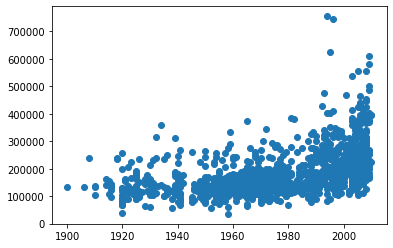

In [12]:
# GarageYrBlt has 5% missing values , need to see if this col is of any relevance as such..Plotting quickly to see any trend ?
plt.scatter(x=data.GarageYrBlt, y=data.SalePrice)

In [13]:
data.drop(columns=['GarageYrBlt'], axis=1, inplace=True)

In [14]:
#check for missing values - NONE ! 
np.round(100*data.isnull().sum()/len(data),2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath     

#### Checking for Variability / cardinality for the columns so as to appropriately group where needed. 

In [15]:
for col in data.columns:
    if (data[col].dtype == 'object'):
        print("------------{0} %tage splits------------".format(col))
        print(100*data[col].value_counts(normalize=True,dropna=False))

------------MSZoning %tage splits------------
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
------------Street %tage splits------------
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
------------Alley %tage splits------------
FEATURE_NOT_AVAIL    93.767123
Grvl                  3.424658
Pave                  2.808219
Name: Alley, dtype: float64
------------LotShape %tage splits------------
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
------------LandContour %tage splits------------
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
------------Utilities %tage splits------------
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
------------LotConfig %tage splits------------
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178

#### Dropping the columns where variability is less (near Zero) and data in hugely impbalanced ie. > 95% ~ 97%

In [16]:
data.drop(columns=['Street','Utilities','Condition2','RoofMatl','Heating','PoolQC','MiscFeature'], axis=1, inplace=True)

In [17]:
#reducing the dimesions/cardinality where the value counts are <3% overall put together as others
listofcols=['Neighborhood',
'Condition1',
'BldgType',
'HouseStyle',
'RoofStyle',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'ExterQual',
'ExterCond',
'Foundation',
'BsmtCond',
'BsmtQual',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'HeatingQC',
'Electrical',
'Functional',
'FireplaceQu',
'GarageType',
'GarageQual',
'GarageCond',
'SaleType',
'SaleCondition',
]

In [18]:
for col in listofcols:
    l = list(pd.DataFrame(data[col].value_counts()[100*data[col].value_counts(normalize= True) < 3]).index)
    data[col] = data[col].apply(lambda x: 'Others' if x in l else x)

### Checking the variability in the categorical columns post modification

In [19]:
for col in data.columns:
    if (data[col].dtype == 'object'):
        print("------------{0} %tage splits------------".format(col))
        print(100*data[col].value_counts(normalize=True,dropna=False))
        l.append(col)

------------MSZoning %tage splits------------
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
------------Alley %tage splits------------
FEATURE_NOT_AVAIL    93.767123
Grvl                  3.424658
Pave                  2.808219
Name: Alley, dtype: float64
------------LotShape %tage splits------------
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
------------LandContour %tage splits------------
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
------------LotConfig %tage splits------------
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64
------------LandSlope %tage splits------------
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64
------------Neighborhood %tage splits-------

#### Checking for outliers for continuous variables (out side of IQR)

In [20]:
l=[]
for col in data.columns:
    if (data[col].dtype == 'int64' or data[col].dtype =='float64'):
        print("----------------{0}----------------".format(col))
        q1 = data[col].quantile(0.25)
        q3  = data[col].quantile(0.75)
        iqr=q3-q1
        lowqe_bound=q1 - 1.5 * iqr
        upper_bound=q3 + 1.5 * iqr
        outliers = data[((data[col] < lowqe_bound) | (data[col] > upper_bound))]
        #checking if anyof the column values are out of inter quartile range
        print(outliers.shape[0])
        if outliers.shape[0] != 0:
            l.append(col)
print("Following Columns have outliers and will need to be treated:")
print()
print(l)
# Some of the columns are infact categorical and some are sequences ie ID

----------------Id----------------
0
----------------MSSubClass----------------
103
----------------LotFrontage----------------
16
----------------LotArea----------------
69
----------------OverallQual----------------
2
----------------OverallCond----------------
125
----------------MasVnrArea----------------
98
----------------BsmtFinSF1----------------
7
----------------BsmtFinSF2----------------
167
----------------BsmtUnfSF----------------
29
----------------TotalBsmtSF----------------
61
----------------CentralAir----------------
95
----------------1stFlrSF----------------
20
----------------2ndFlrSF----------------
2
----------------LowQualFinSF----------------
26
----------------GrLivArea----------------
31
----------------BsmtFullBath----------------
1
----------------BsmtHalfBath----------------
82
----------------FullBath----------------
0
----------------HalfBath----------------
0
----------------BedroomAbvGr----------------
35
----------------KitchenAbvGr----------------
68

#### Lets plot all the continuous variables wrt to target variable 

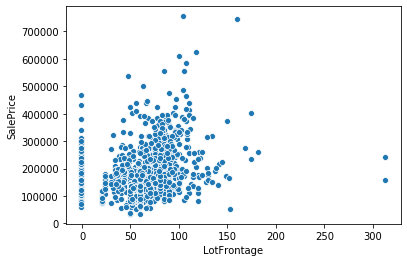

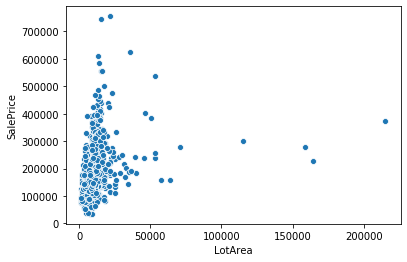

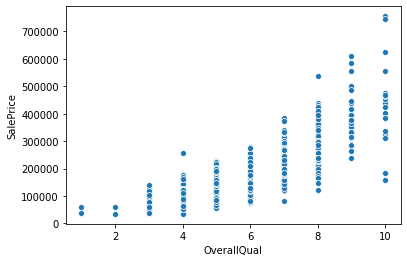

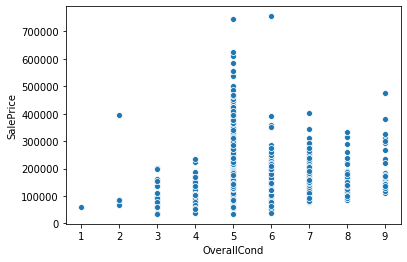

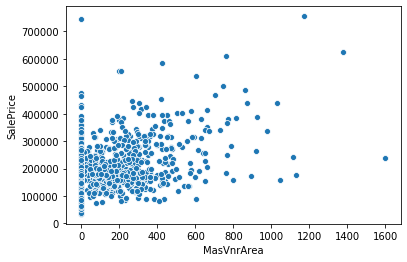

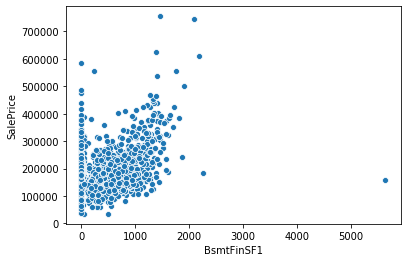

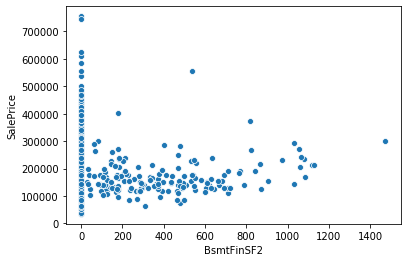

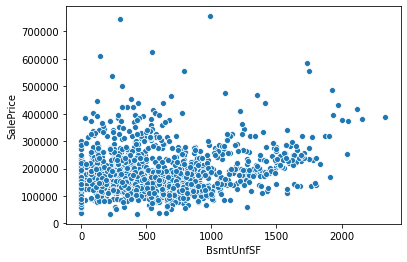

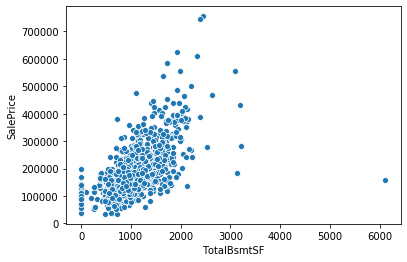

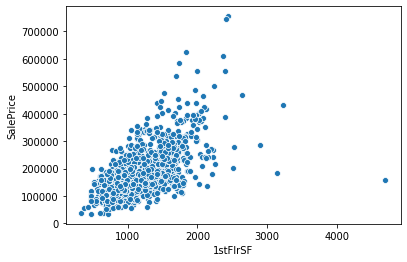

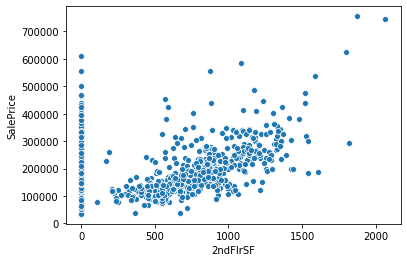

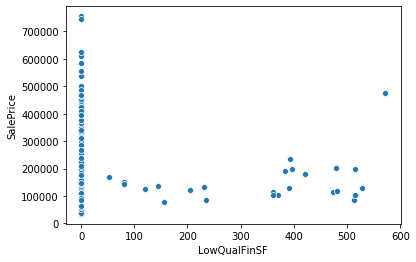

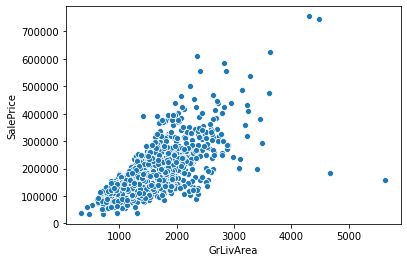

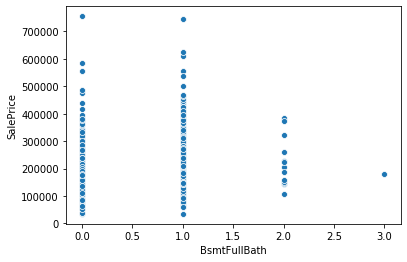

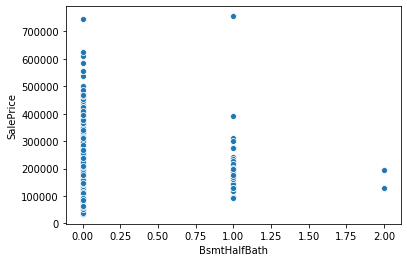

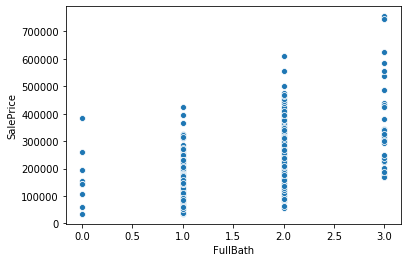

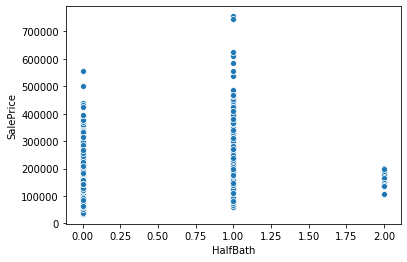

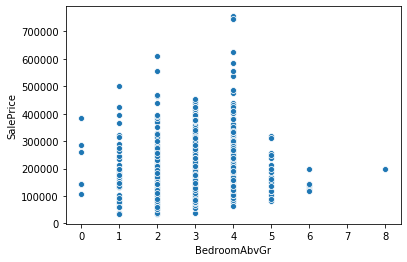

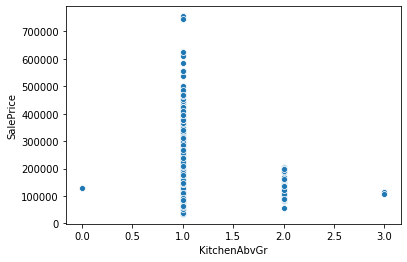

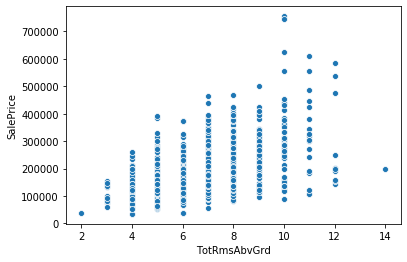

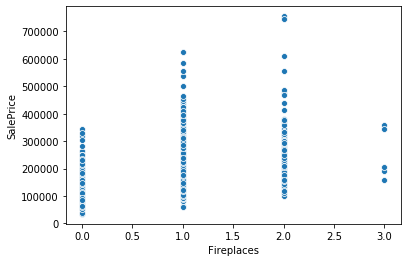

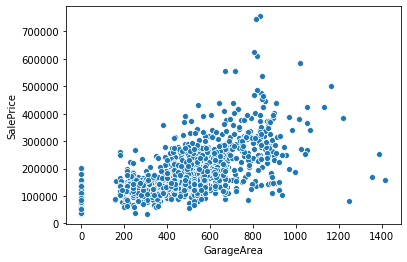

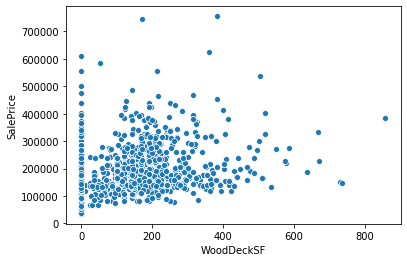

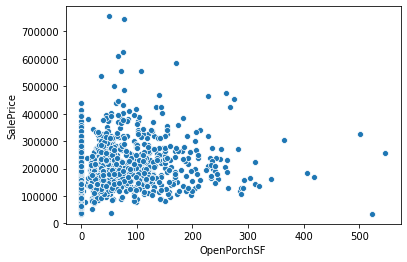

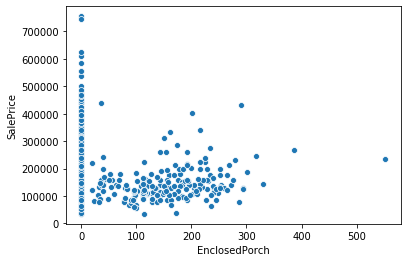

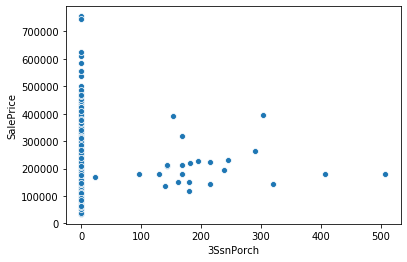

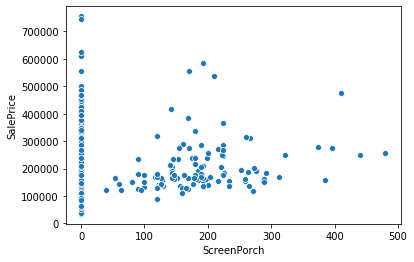

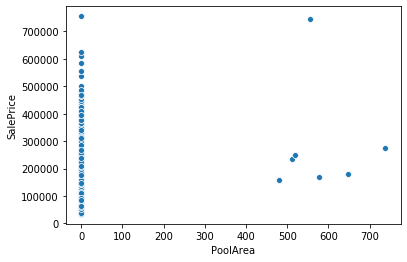

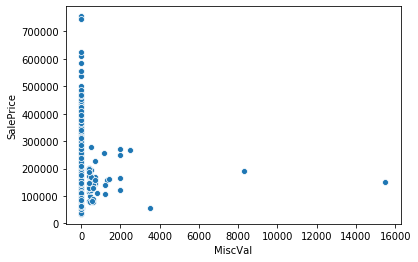

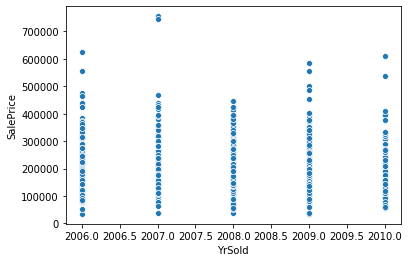

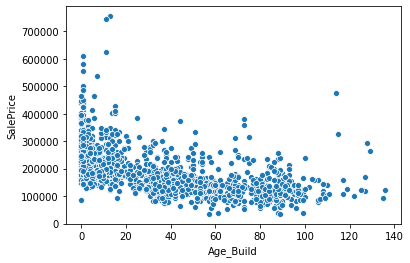

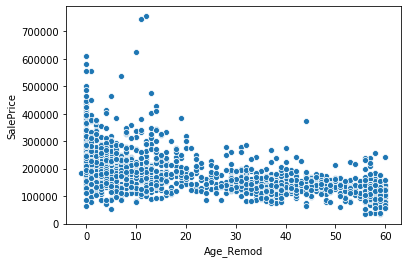

In [21]:
ind_vars = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'Age_Build', 'Age_Remod']
target = 'SalePrice'
for var in ind_vars: 
    sns.scatterplot(data=data, x=var,y=target,)
    plt.show()

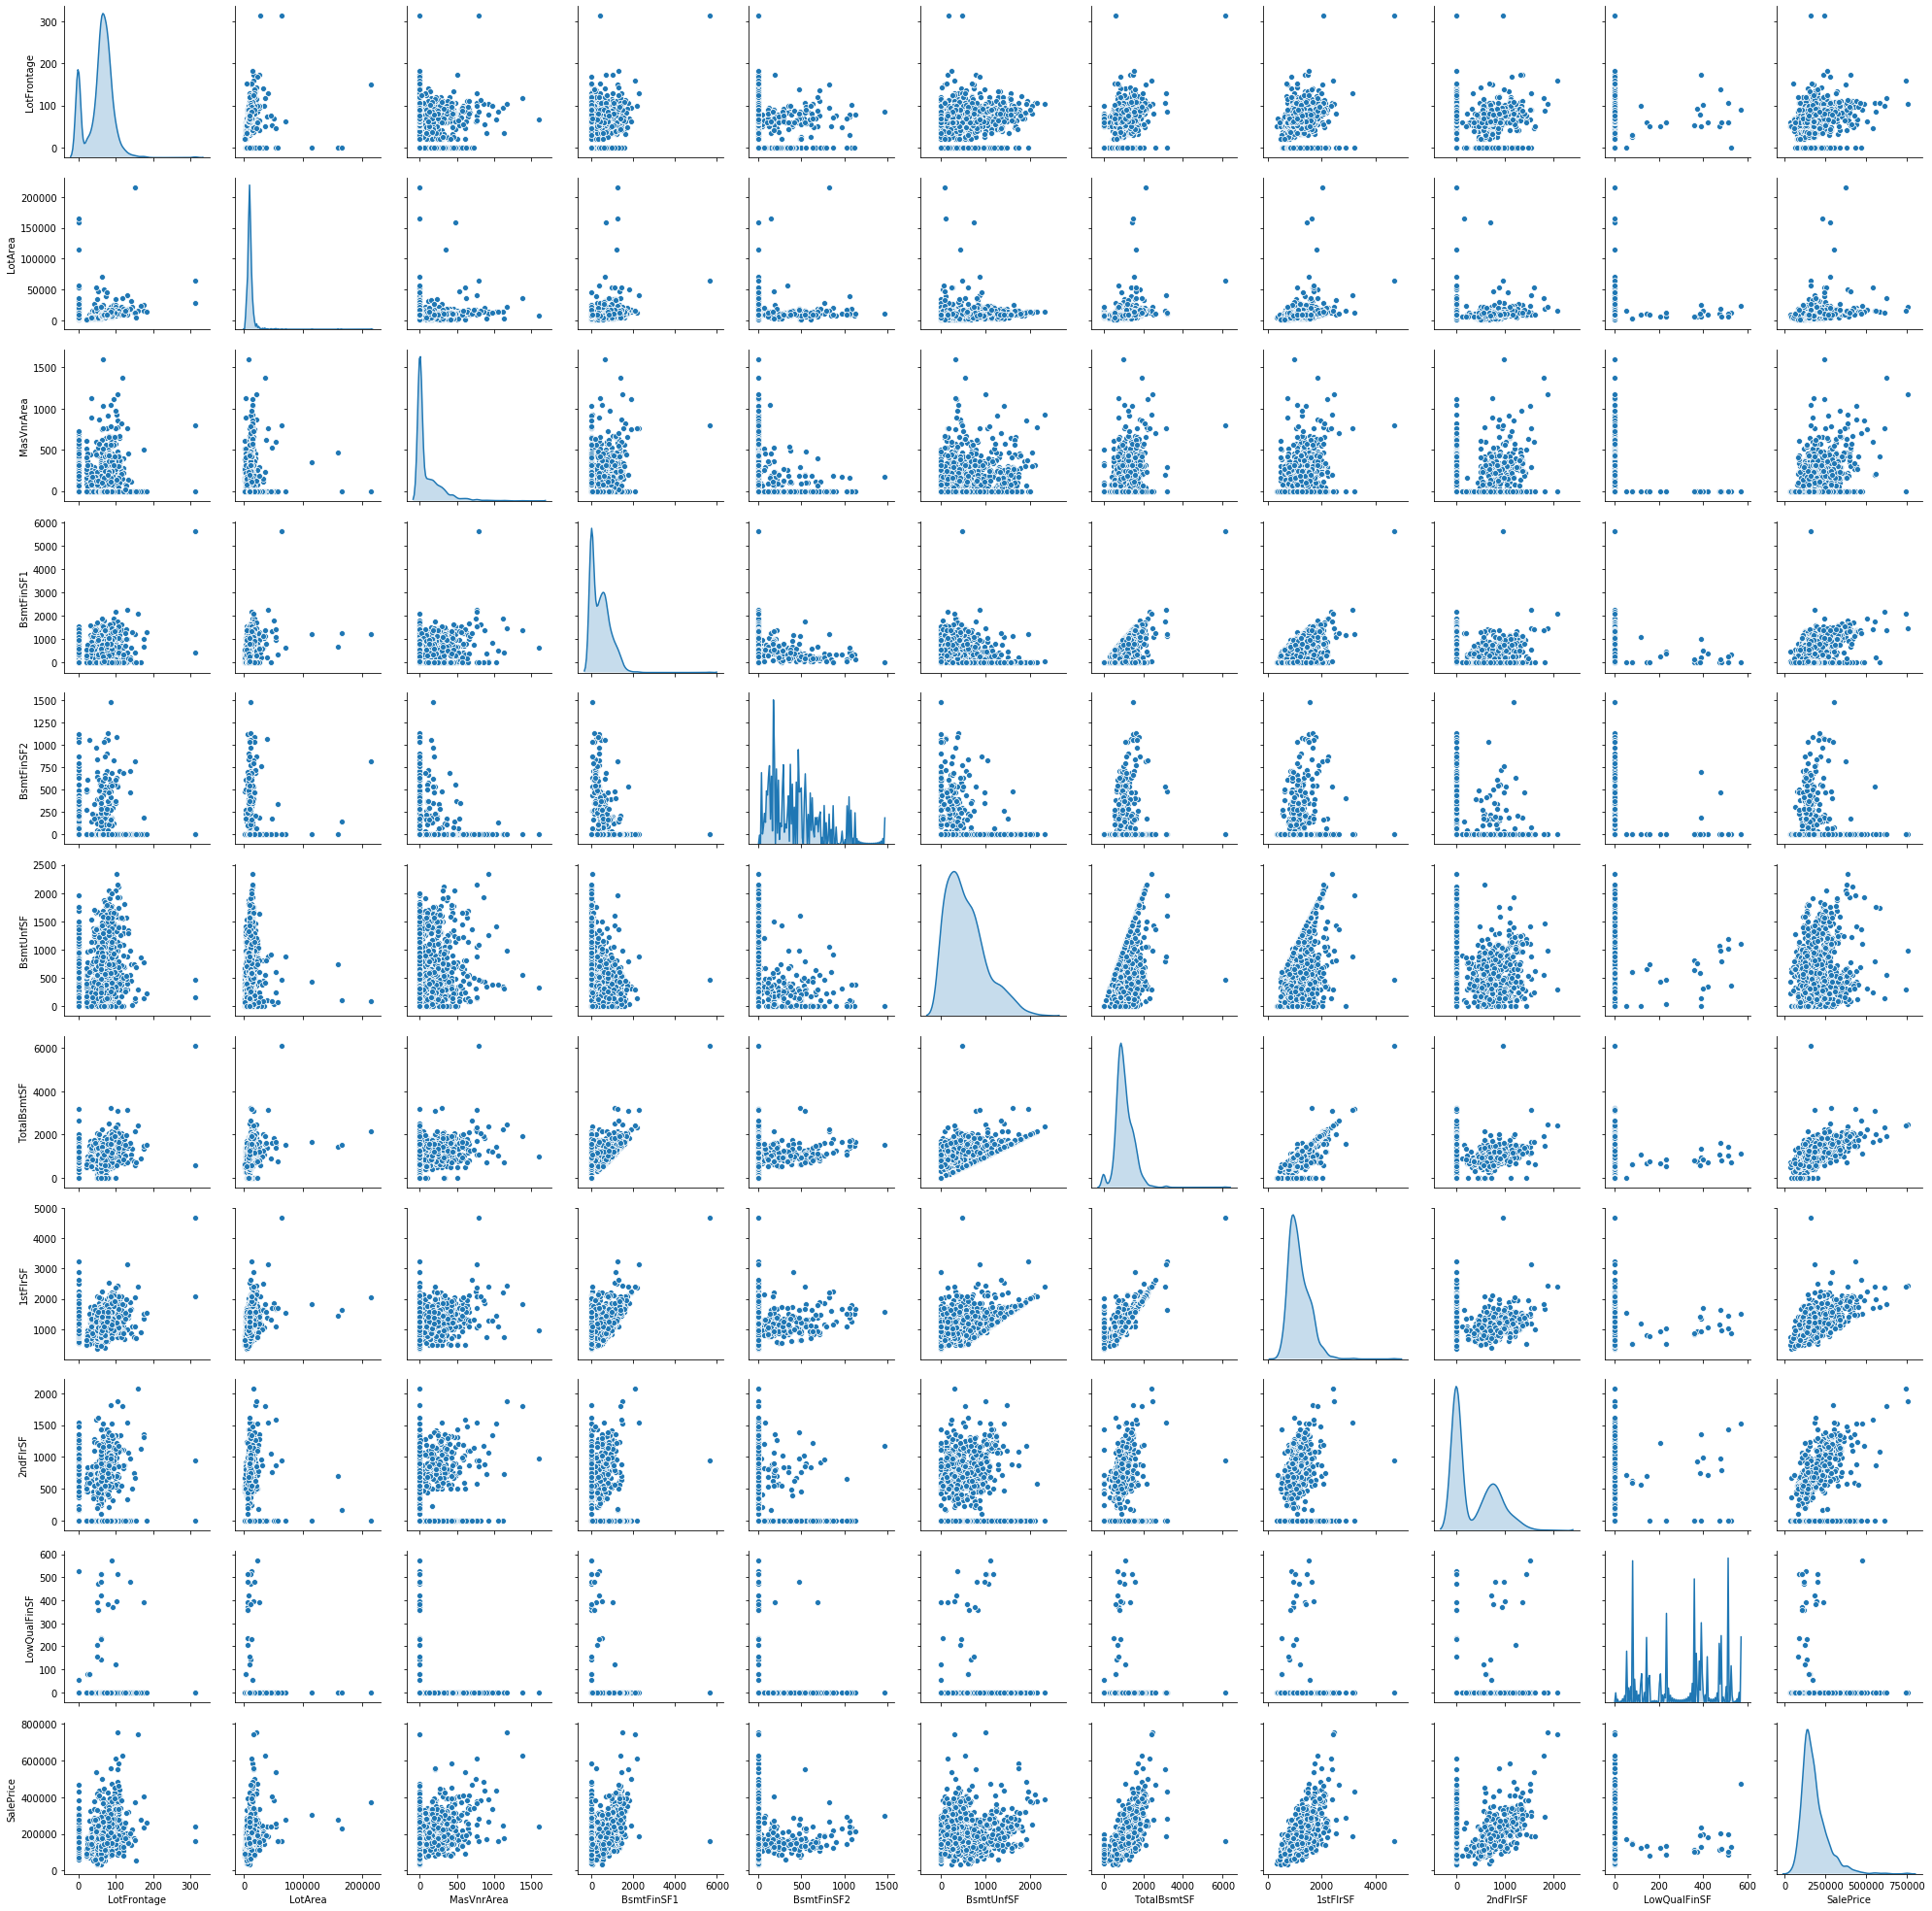

In [22]:
df = data[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'SalePrice']]
sns.pairplot(data=df,diag_kind='kde',)
plt.show()

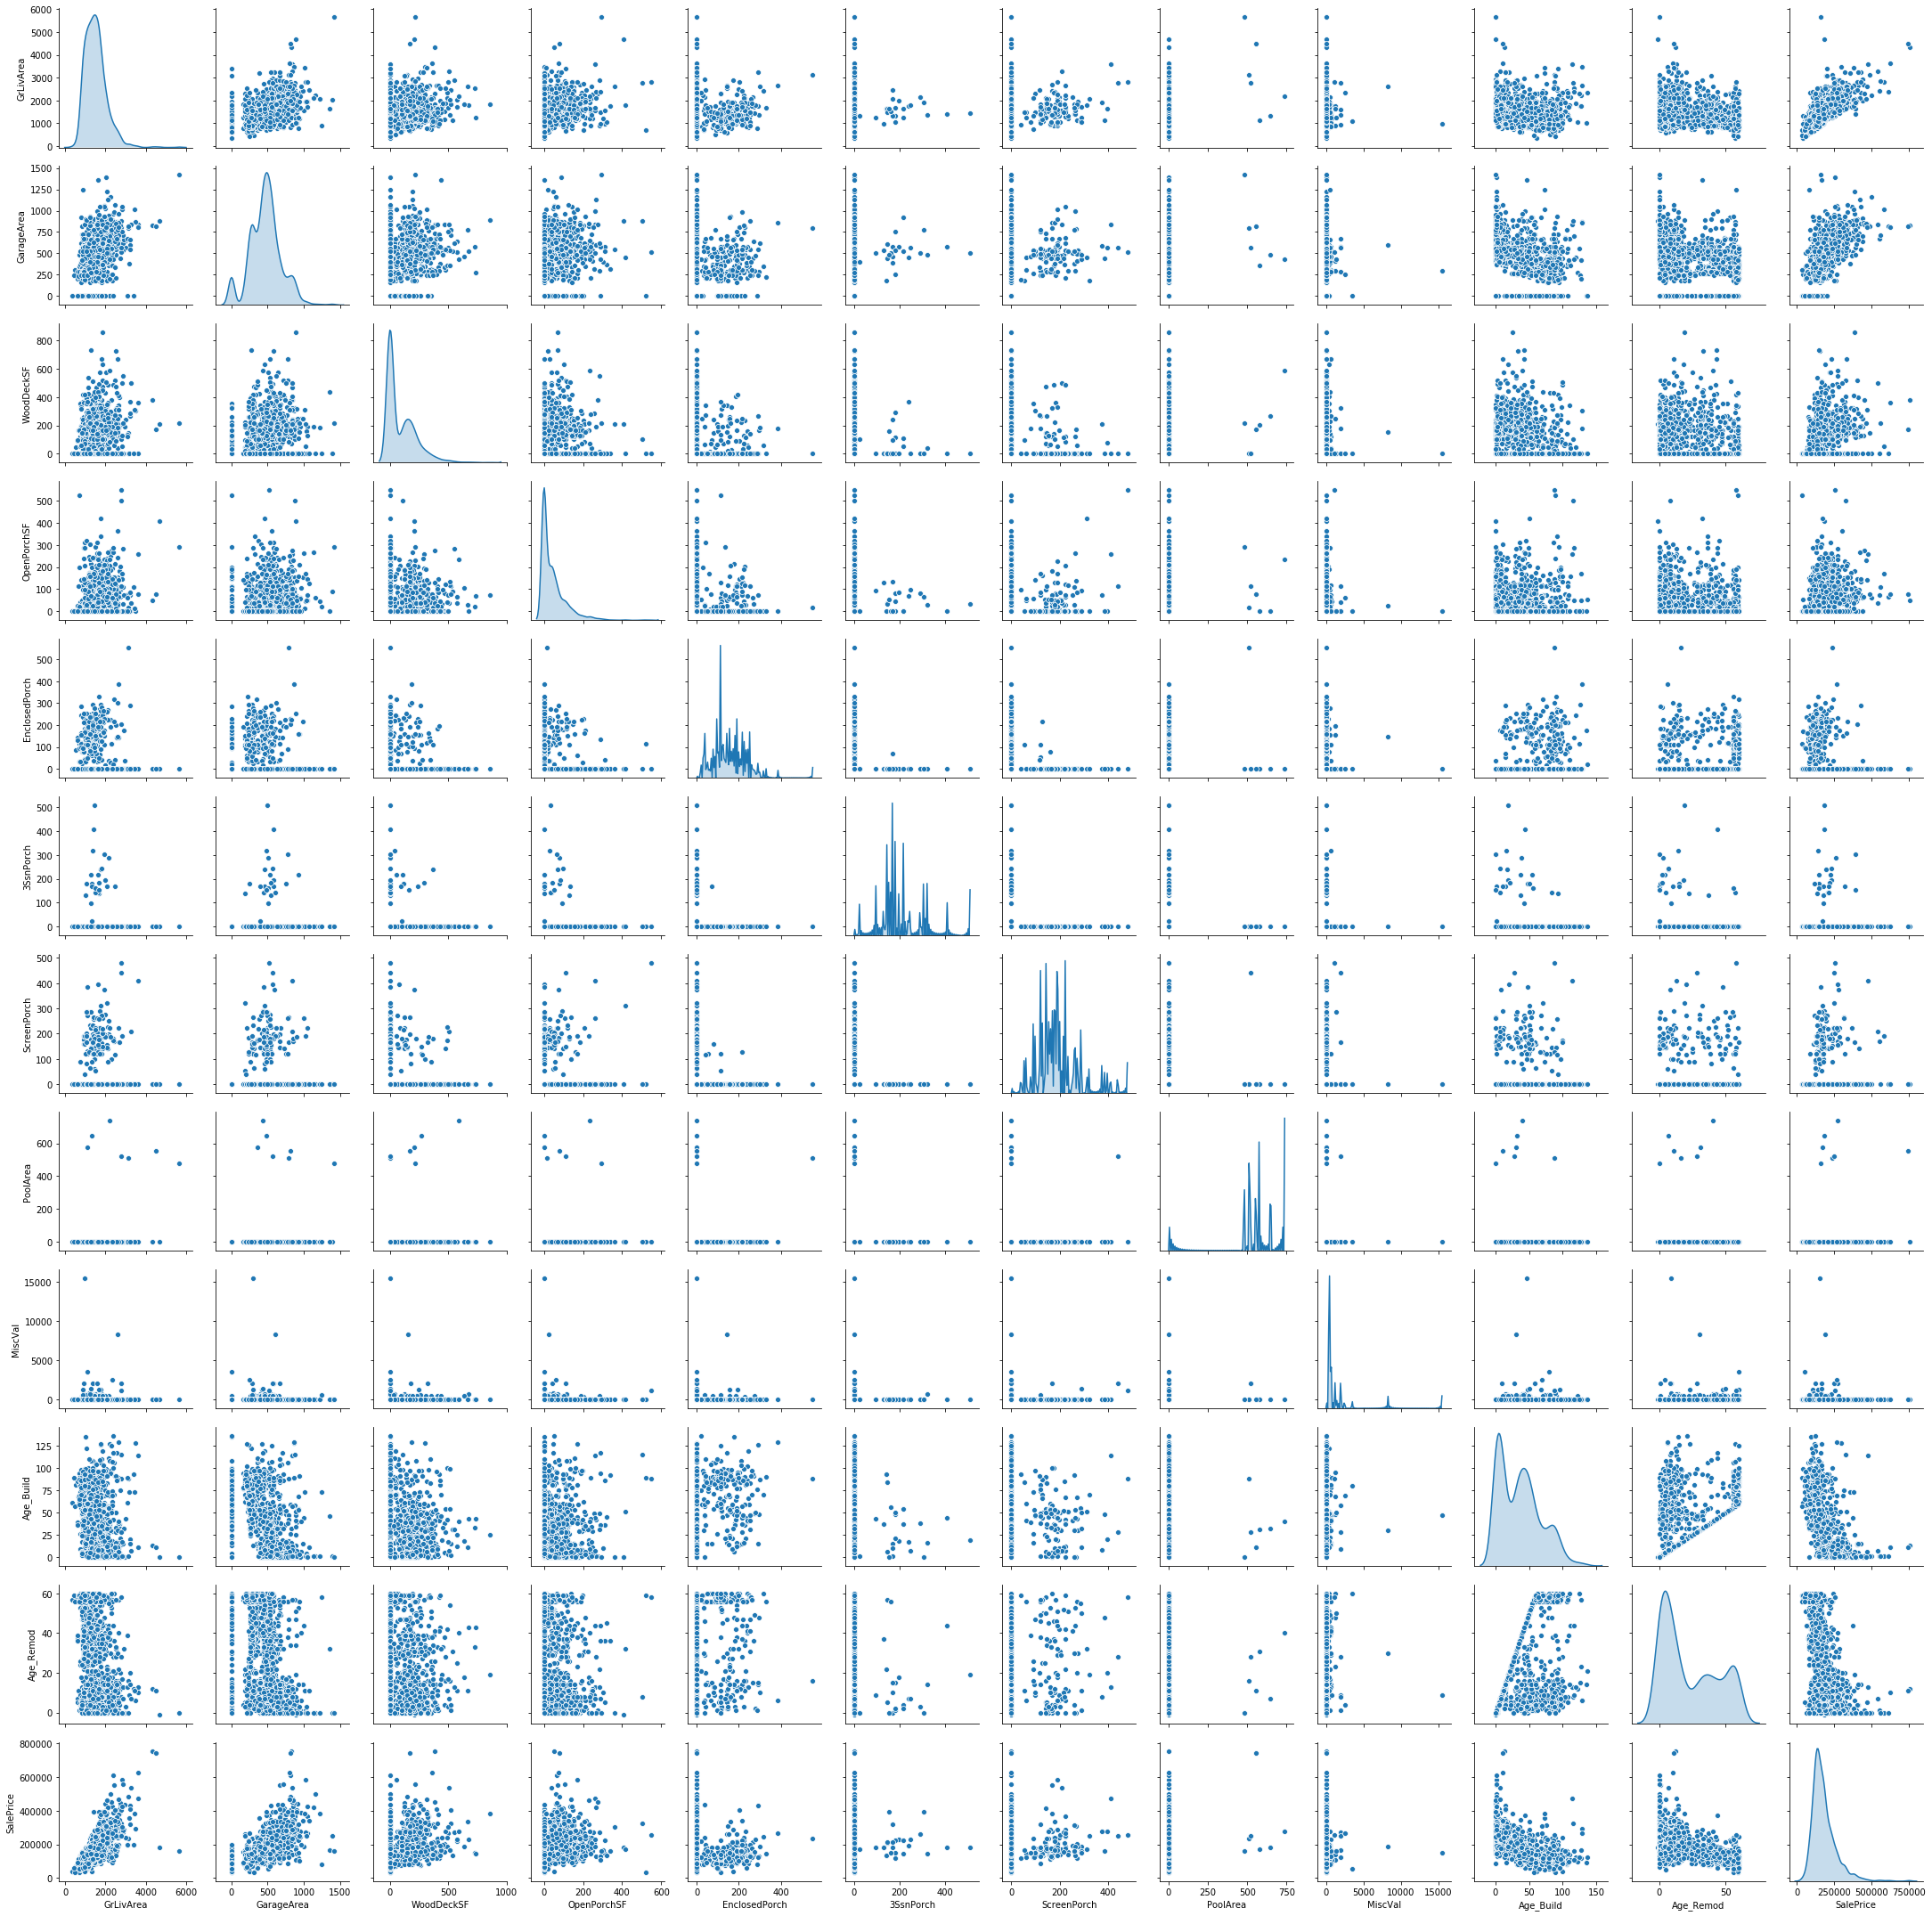

In [23]:
df=data[['GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Age_Build', 'Age_Remod','SalePrice']]
sns.pairplot(data=df,diag_kind='kde',)
plt.show()

### Data Trasformation to make the predictors normal distribution

In [ ]:
# Importing required packages 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import power_transform

In [25]:
#Copy the original dataset for later ref
#data_orig = data.copy()
data_orig.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea              Alley LotShape  \
0   1          60       RL         65.0     8450  FEATURE_NOT_AVAIL      Reg   
1   2          20       RL         80.0     9600  FEATURE_NOT_AVAIL      Reg   
2   3          60       RL         68.0    11250  FEATURE_NOT_AVAIL      IR1   
3   4          70       RL         60.0     9550  FEATURE_NOT_AVAIL      IR1   
4   5          60       RL         84.0    14260  FEATURE_NOT_AVAIL      IR1   

  LandContour LotConfig LandSlope Neighborhood Condition1 BldgType HouseStyle  \
0         Lvl    Inside       Gtl      CollgCr       Norm     1Fam     2Story   
1         Lvl       FR2       Gtl       Others      Feedr     1Fam     1Story   
2         Lvl    Inside       Gtl      CollgCr       Norm     1Fam     2Story   
3         Lvl    Corner       Gtl      Crawfor       Norm     1Fam     2Story   
4         Lvl       FR2       Gtl       Others       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle Exterior1st Exterior2nd MasVnrType  \
0            7            5     Gable     VinylSd     VinylSd    BrkFace   
1            6            8     Gable     MetalSd     MetalSd       None   
2            7            5     Gable     VinylSd     VinylSd    BrkFace   
3            7            5     Gable     Wd Sdng      Others       None   
4            8            5     Gable     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  HeatingQC  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex           1      SBrkr       856       854             0   
1        Ex           1      SBrkr      1262         0             0   
2        Ex           1      SBrkr       920       866             0   
3        Gd           1      SBrkr       961       756             0   
4        Ex           1      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0             1          Gd             8        Typ           0   
1             1          TA             6        Typ           1   
2             1          Gd             6        Typ           1   
3             1          Gd             7        Typ           1   
4             1          Gd             9        Typ           1   

         FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
0  FEATURE_NOT_AVAIL     Attchd          RFn           2         548   
1                 TA     Attchd          RFn           2         460   
2                 TA     Attchd          RFn           2         608   
3                 Gd     Detc

In [28]:
# Power transformaton also scales the data appropriately hence no need for any minMax scaling etc for these numerical variables. 
data[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 
     'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
     'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
     'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
     'PoolArea', 'MiscVal', 'Age_Build','Age_Remod']]= power_transform(data[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 
     'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
     'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
     'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
     'PoolArea', 'MiscVal', 'Age_Build','Age_Remod']],method='yeo-johnson')

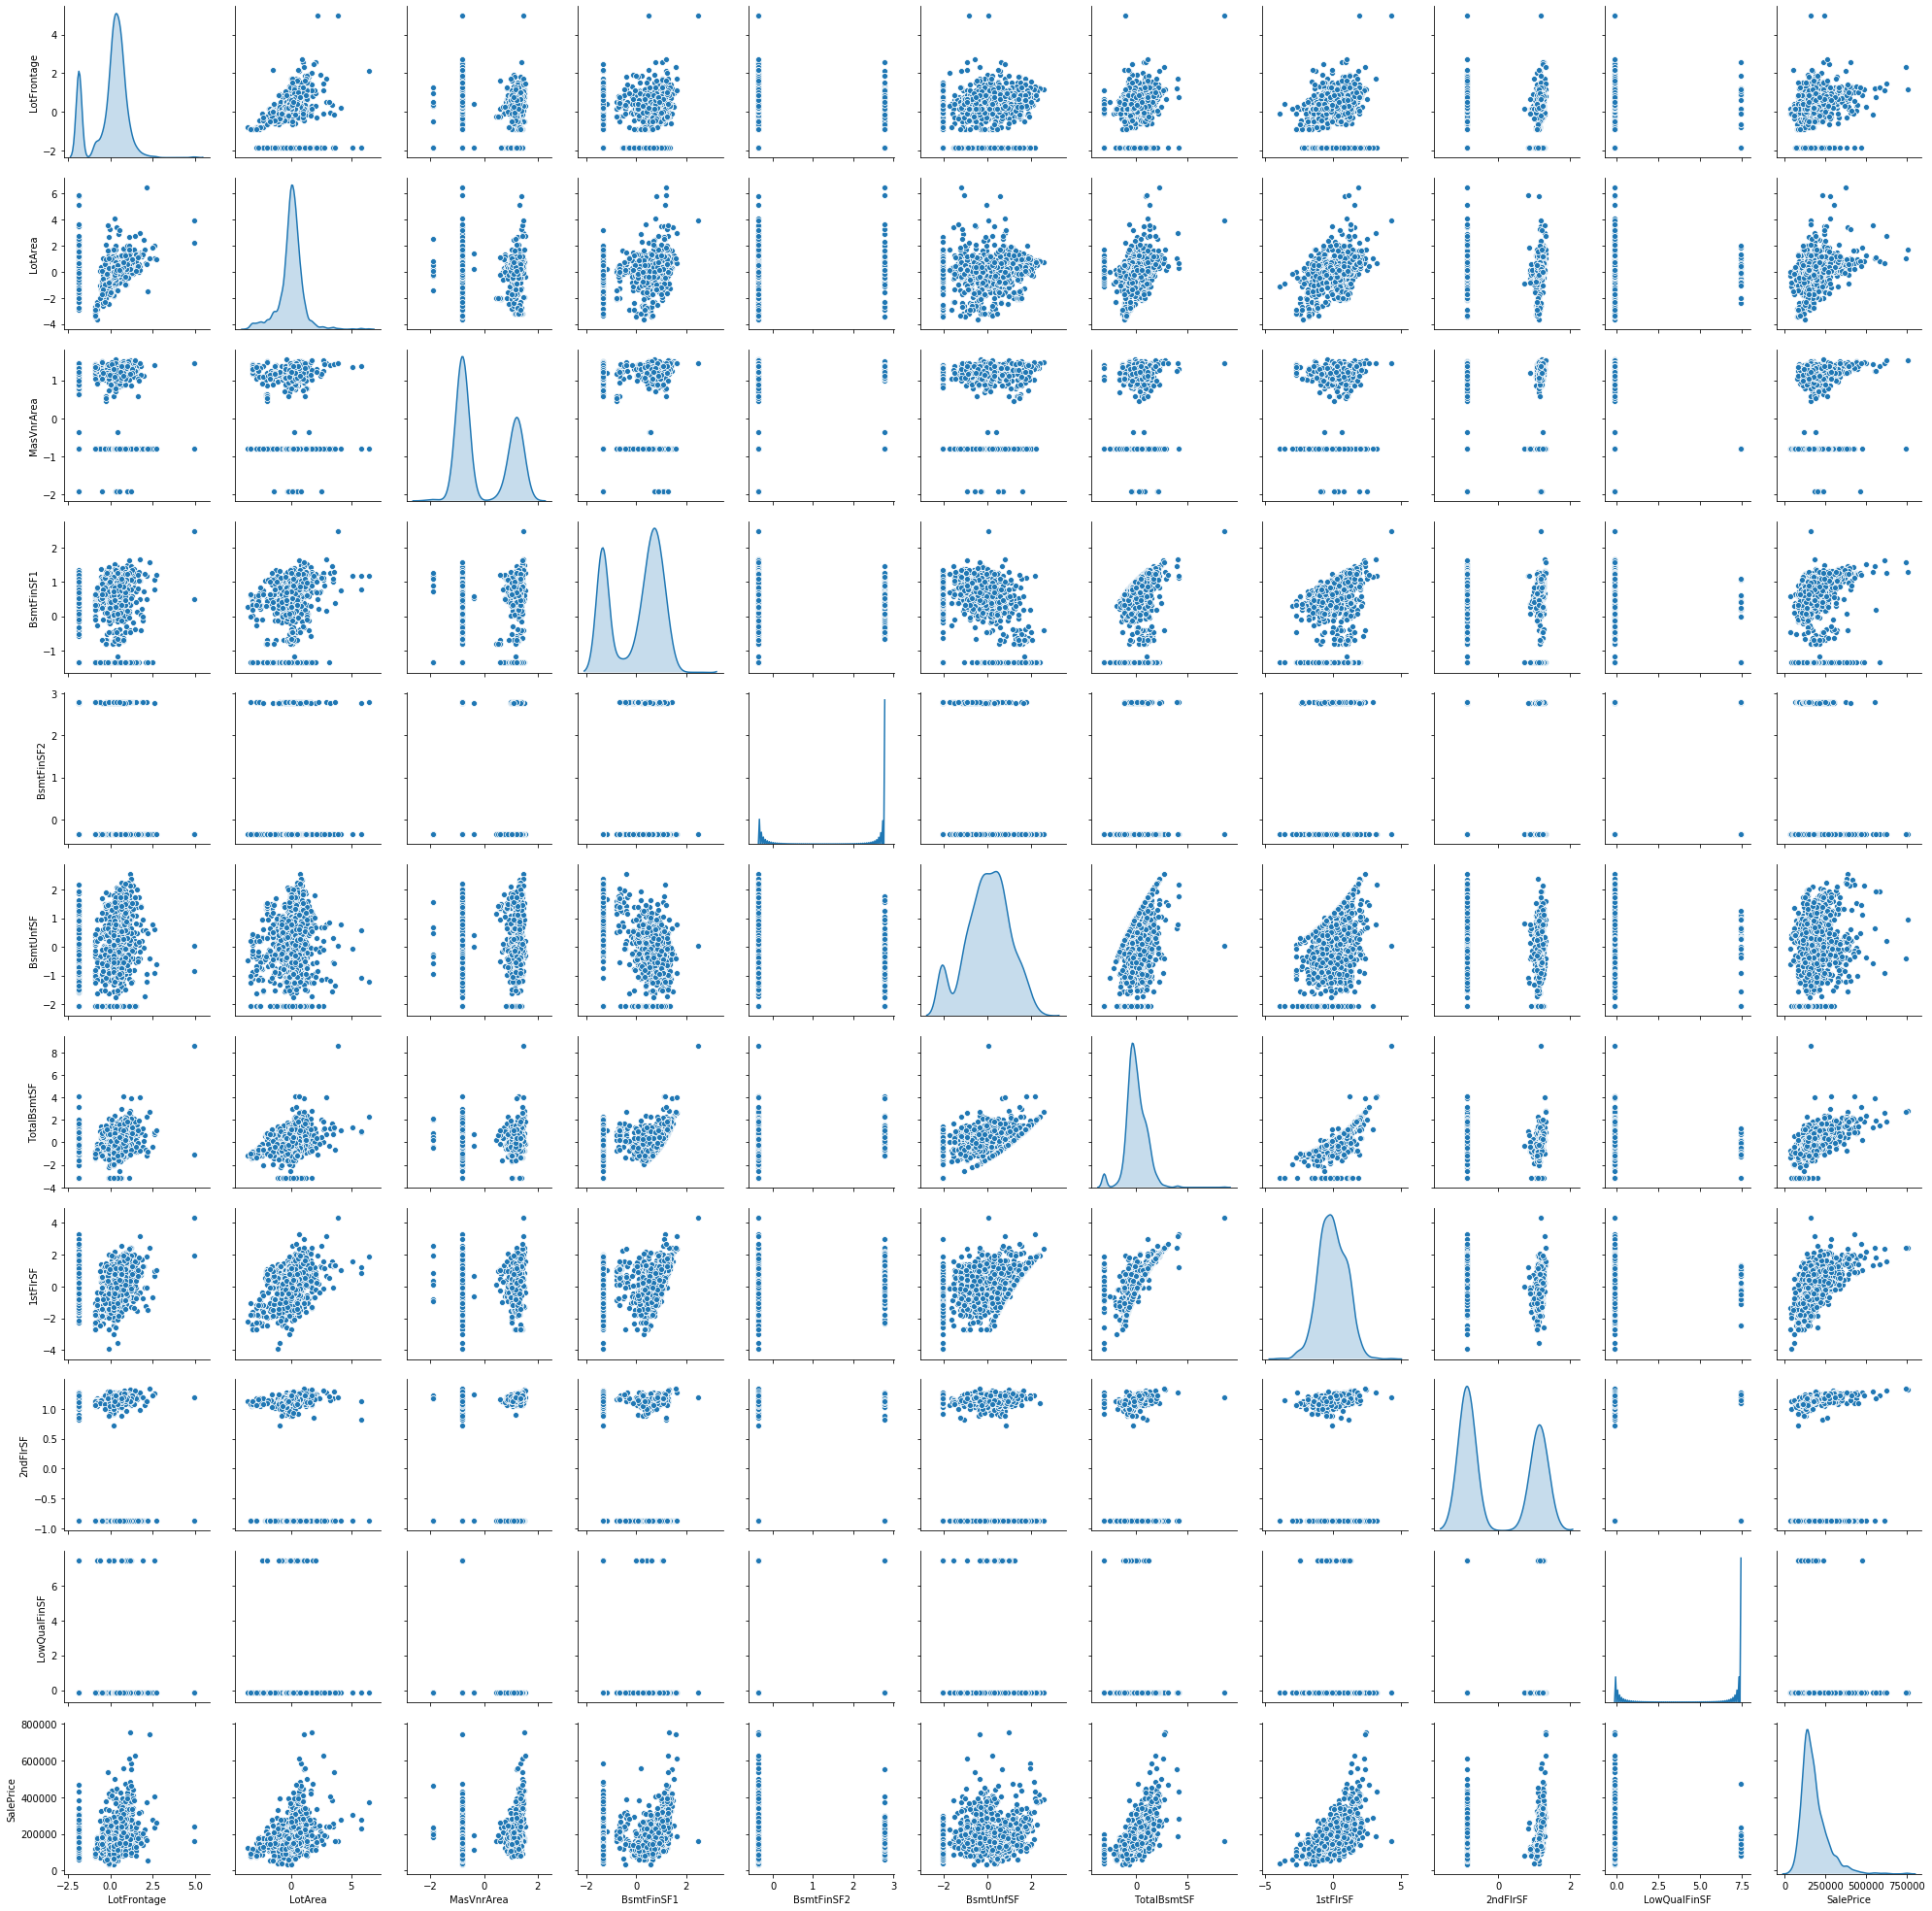

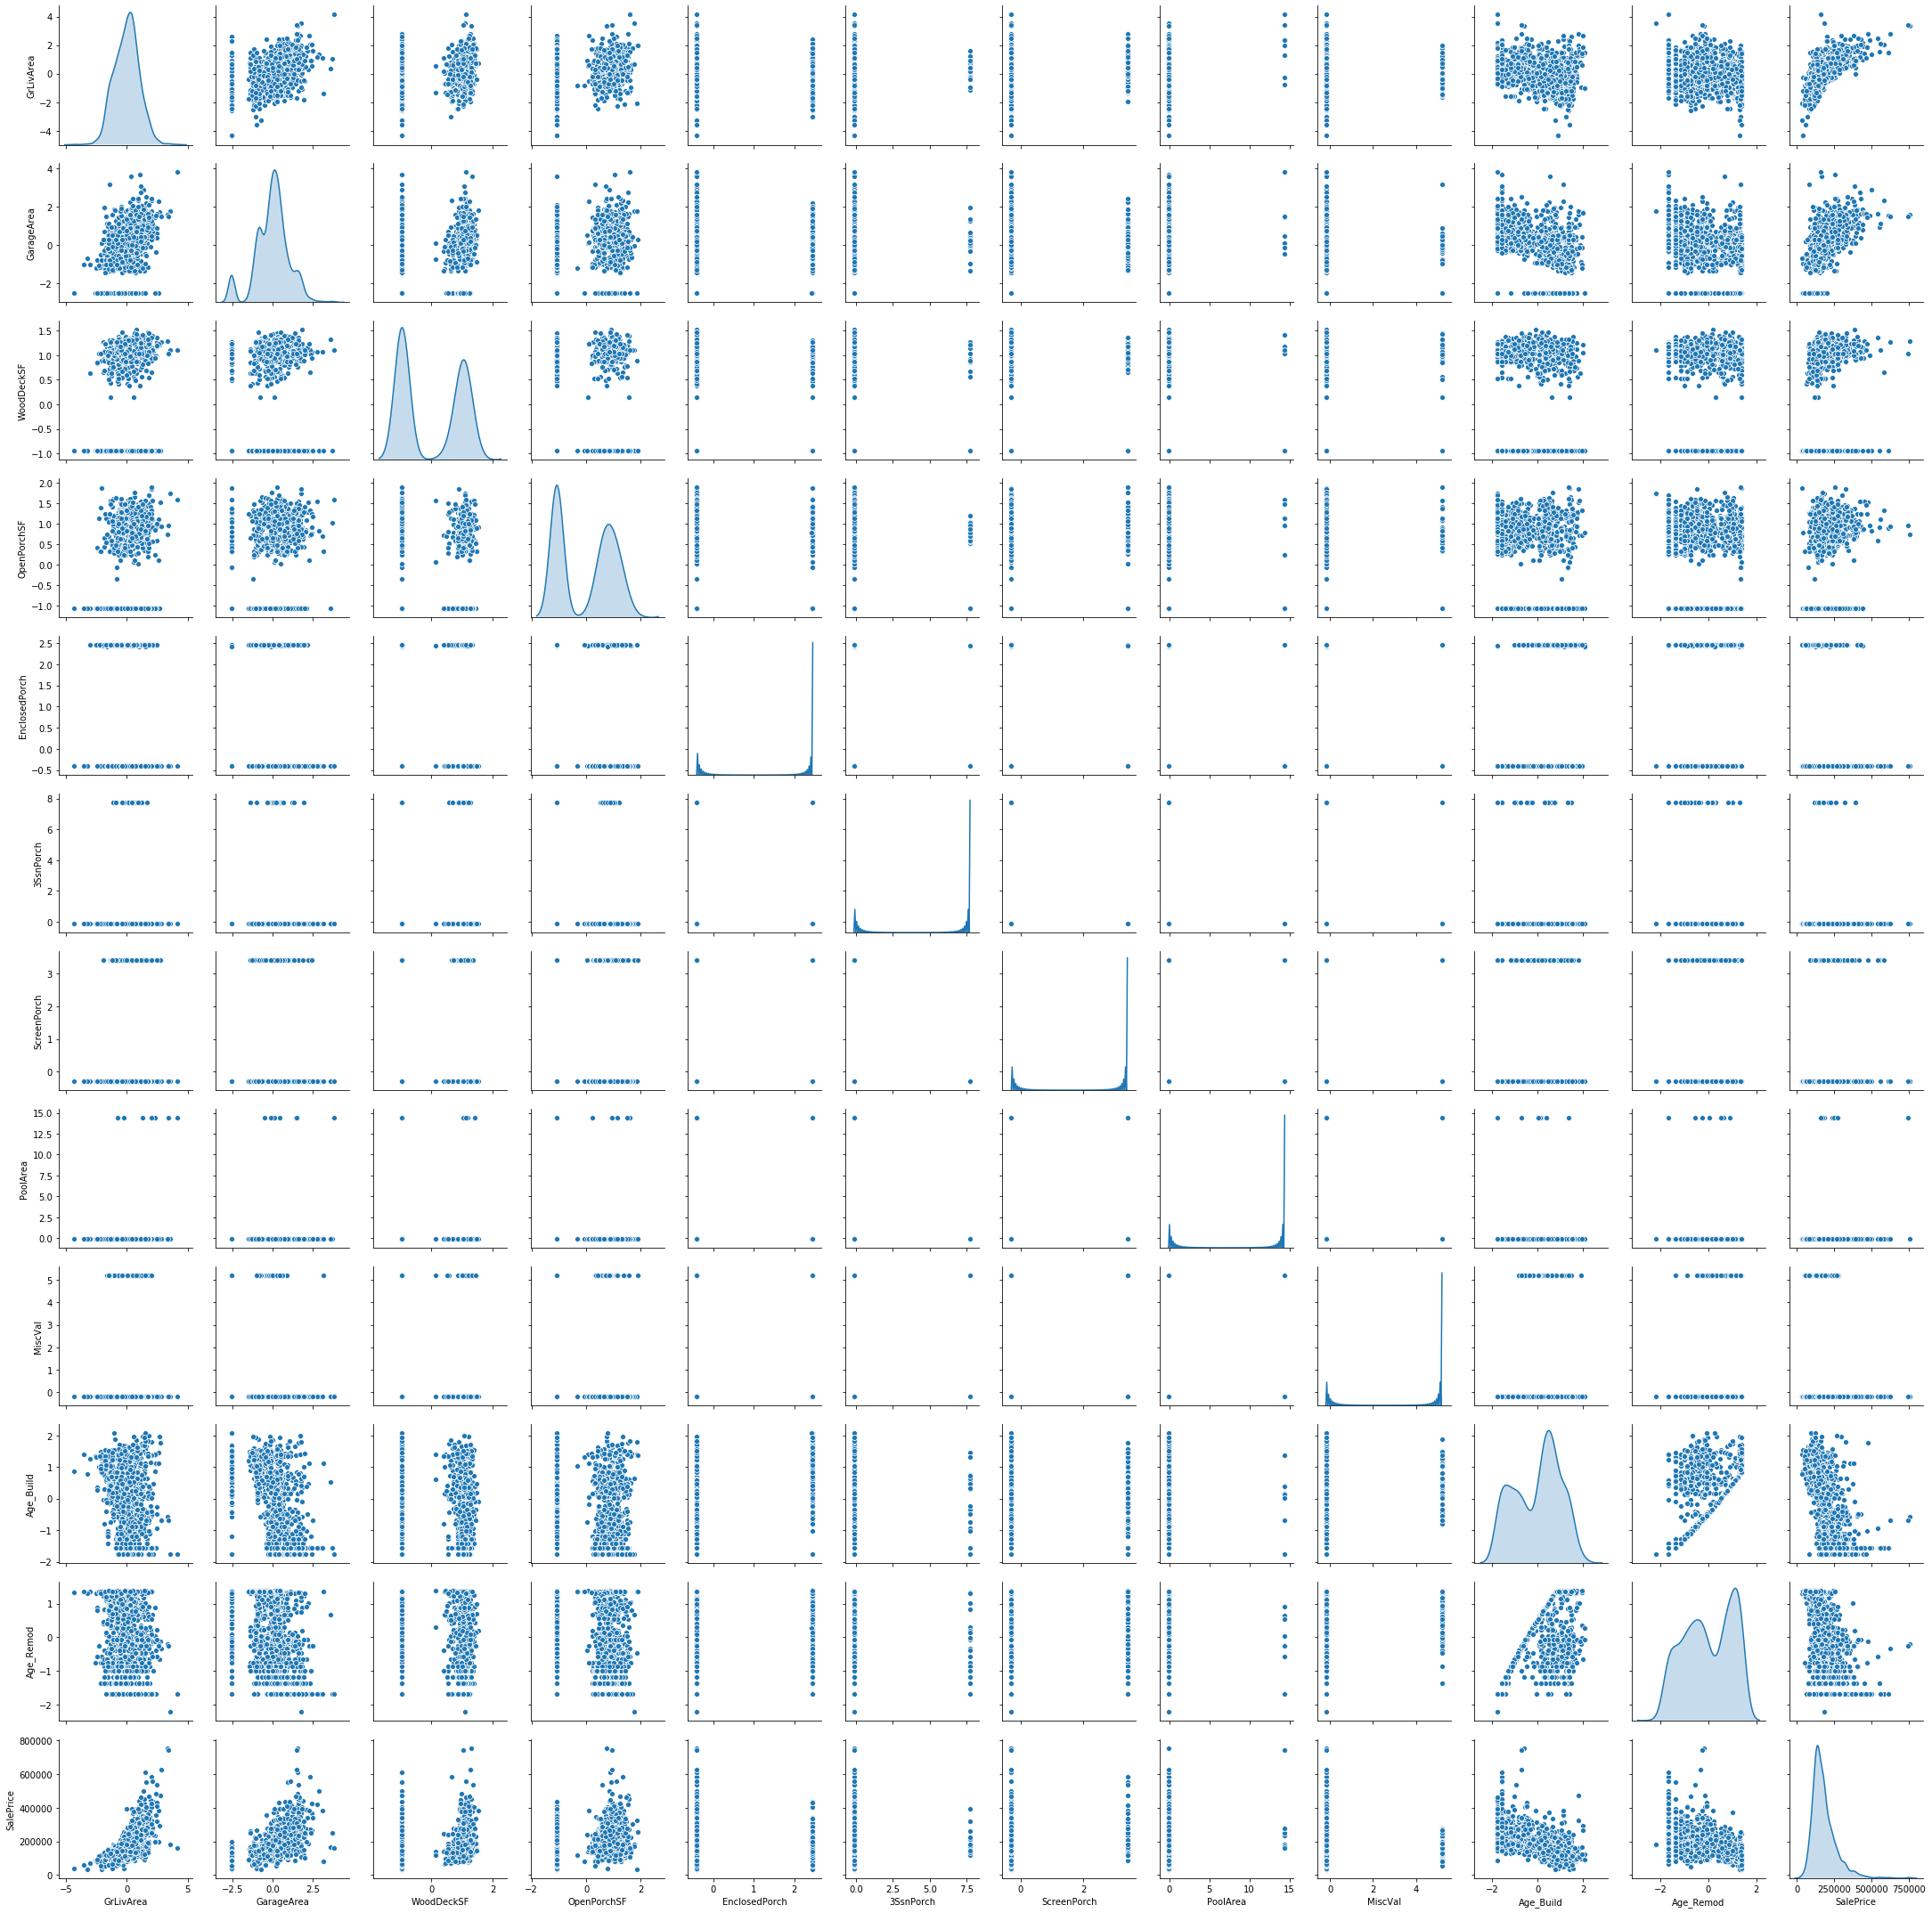

In [29]:
df1 = data[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
 'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','SalePrice']]
sns.pairplot(data=df1,diag_kind='kde')
plt.show()

df2 = data[['GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
 '3SsnPorch','ScreenPorch','PoolArea','MiscVal','Age_Build','Age_Remod','SalePrice']]
sns.pairplot(data=df2,diag_kind='kde')
plt.show()

In [33]:
# all numeric (float and int) variables in the dataset
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0   1    0.493460     0.303848 -0.141171     0.667499    -0.477387   
1   2   -1.164269     0.656959  0.105609    -0.042192     2.011352   
2   3    0.493460     0.376054  0.413721     0.667499    -0.477387   
3   4    0.698191     0.181520  0.095490     0.667499    -0.477387   
4   5    0.493460     0.748065  0.877127     1.350924    -0.477387   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  \
0    1.226110    0.797537   -0.359384  -0.887576    -0.404029    0.263813   
1   -0.805270    1.011471   -0.359384  -0.434388     0.508177    0.263813   
2    1.188347    0.571325   -0.359384  -0.048083    -0.253787    0.263813   
3   -0.805270    0.142272   -0.359384   0.183337    -0.644806    0.263813   
4    1.331450    0.750541   -0.359384   0.077485     0.254387    0.263813   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.799624  1.170239     -0.134652   0.528531      1.175573     -0.243940   
1  0.429151 -0.871454     -0.134652  -0.382755     -0.838866      4.099375   
2 -0.568533  1.172896     -0.134652   0.659112      1.175573     -0.243940   
3 -0.429428  1.146834     -0.134652   0.540797      1.175573     -0.243940   
4  0.124698  1.209630     -0.134652   1.282894      1.175573     -0.243940   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1      0.170752     -0.172658      0.946380   -1.027341   
1         2         0      0.170752     -0.172658     -0.234627    0.784005   
2         2         1      0.170752     -0.172658     -0.234627    0.784005   
3         1         0      0.170752     -0.172658      0.389921    0.784005   
4         2         1      1.382874     -0.172658      1.448615    0.784005   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0    0.273835    0.383899   -0.950337     0.841820      -0.407595  -0.129279   
1    0.273835   -0.004602    1.213714    -1.071307      -0.407595  -0.129279   
2    0.273835    0.641990   -0.950337     0.668453      -0.407595  -0.129279   
3    1.759713    0.786092   -0.950337     0.584540       2.456640  -0.129279   
4    1.759713    1.583257    1.079695     0.991895      -0.407595  -0.129279   

   ScreenPorch  PoolArea   MiscVal  MoSold  YrSold  SalePrice  Age_Build  \
0    -0.293785 -0.069409 -0.192177       2    2008     208500  -1.099088   
1    -0.293785 -0.069409 -0.192177       5    2007     181500   0.119351   
2    -0.293785 -0.069409 -0.192177       9    2008     223500  -0.942898   
3    -0.293785 -0.069409 -0.192177       2    2006     140000   1.426823   
4    -0.293785 -0.069409 -0.192177      12    2008     250000  -0.873619   

   Age_Remod  
0  -0.752653  
1   0.645629  
2  -0.649602  
3   0.800808  
4  -0.471720

In [34]:
# dropping unwanted cols 
data_numeric = data_numeric.drop(['Id','CentralAir','MoSold','YrSold'], axis=1)
data_numeric.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0    0.493460     0.303848 -0.141171     0.667499    -0.477387    1.226110   
1   -1.164269     0.656959  0.105609    -0.042192     2.011352   -0.805270   
2    0.493460     0.376054  0.413721     0.667499    -0.477387    1.188347   
3    0.698191     0.181520  0.095490     0.667499    -0.477387   -0.805270   
4    0.493460     0.748065  0.877127     1.350924    -0.477387    1.331450   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0    0.797537   -0.359384  -0.887576    -0.404029 -0.799624  1.170239   
1    1.011471   -0.359384  -0.434388     0.508177  0.429151 -0.871454   
2    0.571325   -0.359384  -0.048083    -0.253787 -0.568533  1.172896   
3    0.142272   -0.359384   0.183337    -0.644806 -0.429428  1.146834   
4    0.750541   -0.359384   0.077485     0.254387  0.124698  1.209630   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0     -0.134652   0.528531      1.175573     -0.243940         2         1   
1     -0.134652  -0.382755     -0.838866      4.099375         2         0   
2     -0.134652   0.659112      1.175573     -0.243940         2         1   
3     -0.134652   0.540797      1.175573     -0.243940         1         0   
4     -0.134652   1.282894      1.175573     -0.243940         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0      0.170752     -0.172658      0.946380   -1.027341    0.273835   
1      0.170752     -0.172658     -0.234627    0.784005    0.273835   
2      0.170752     -0.172658     -0.234627    0.784005    0.273835   
3      0.170752     -0.172658      0.389921    0.784005    1.759713   
4      1.382874     -0.172658      1.448615    0.784005    1.759713   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0    0.383899   -0.950337     0.841820      -0.407595  -0.129279    -0.293785   
1   -0.004602    1.213714    -1.071307      -0.407595  -0.129279    -0.293785   
2    0.641990   -0.950337     0.668453      -0.407595  -0.129279    -0.293785   
3    0.786092   -0.950337     0.584540       2.456640  -0.129279    -0.293785   
4    1.583257    1.079695     0.991895      -0.407595  -0.129279    -0.293785   

   PoolArea   MiscVal  SalePrice  Age_Build  Age_Remod  
0 -0.069409 -0.192177     208500  -1.099088  -0.752653  
1 -0.069409 -0.192177     181500   0.119351   0.645629  
2 -0.069409 -0.192177     223500  -0.942898  -0.649602  
3 -0.069409 -0.192177     140000   1.426823   0.800808  
4 -0.069409 -0.192177     250000  -0.873619  -0.471720

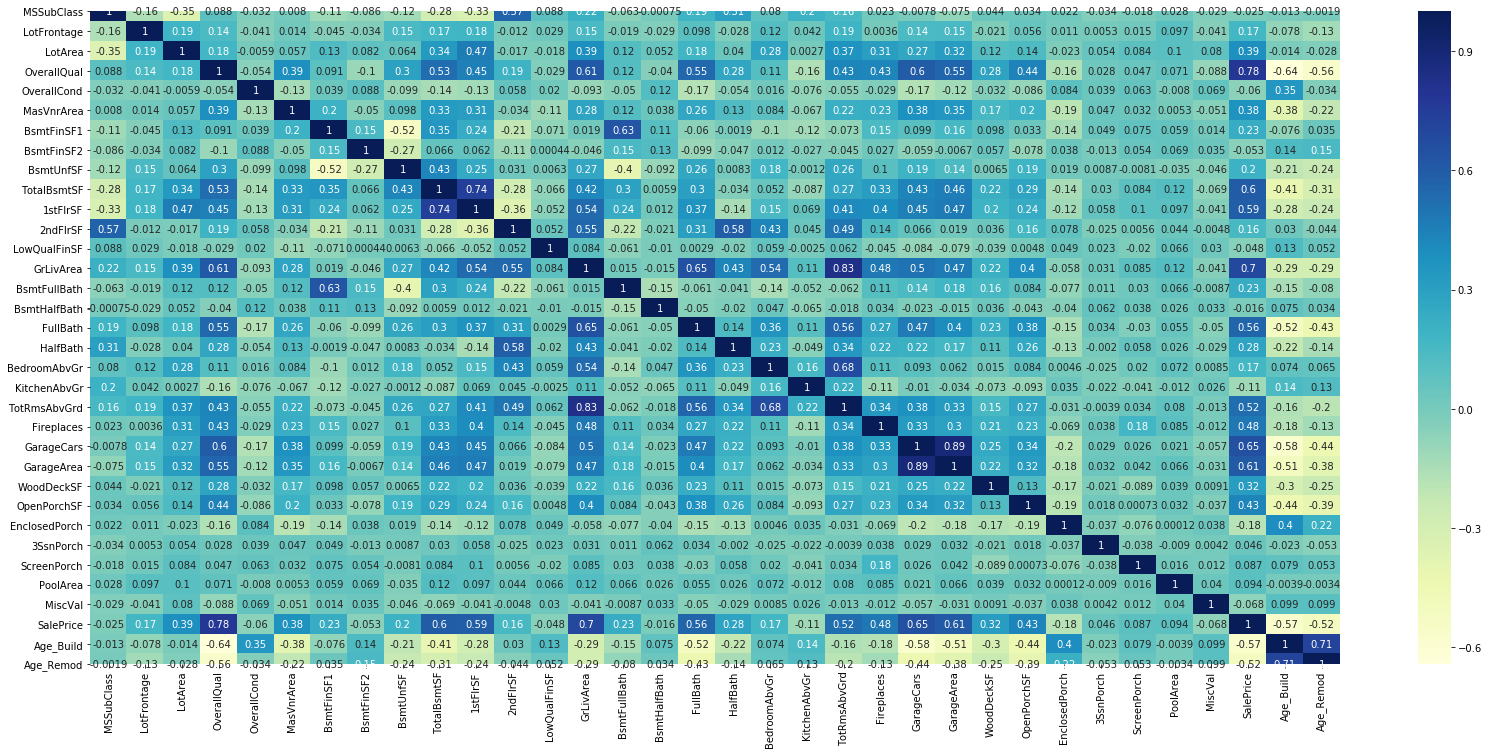

In [35]:
# correlation matrix
cor = data_numeric.corr()
# plotting correlations on a heatmap
# figure size
plt.figure(figsize=(28,12))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### Creating a dummy variable for some of the categorical variables and dropping the first one.

In [36]:
# subset all categorical variables
data_categ = data.select_dtypes(include=['object'])
data_categ.head()

MSZoning              Alley LotShape LandContour LotConfig LandSlope  \
0       RL  FEATURE_NOT_AVAIL      Reg         Lvl    Inside       Gtl   
1       RL  FEATURE_NOT_AVAIL      Reg         Lvl       FR2       Gtl   
2       RL  FEATURE_NOT_AVAIL      IR1         Lvl    Inside       Gtl   
3       RL  FEATURE_NOT_AVAIL      IR1         Lvl    Corner       Gtl   
4       RL  FEATURE_NOT_AVAIL      IR1         Lvl       FR2       Gtl   

  Neighborhood Condition1 BldgType HouseStyle RoofStyle Exterior1st  \
0      CollgCr       Norm     1Fam     2Story     Gable     VinylSd   
1       Others      Feedr     1Fam     1Story     Gable     MetalSd   
2      CollgCr       Norm     1Fam     2Story     Gable     VinylSd   
3      Crawfor       Norm     1Fam     2Story     Gable     Wd Sdng   
4       Others       Norm     1Fam     2Story     Gable     VinylSd   

  Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   
1     MetalSd       None        TA        TA     CBlock       Gd       TA   
2     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   
3      Others       None        TA        TA     BrkTil       TA       Gd   
4     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2 HeatingQC Electrical KitchenQual  \
0           No          GLQ          Unf        Ex      SBrkr          Gd   
1           Gd          ALQ          Unf        Ex      SBrkr          TA   
2           Mn          GLQ          Unf        Ex      SBrkr          Gd   
3           No          ALQ          Unf        Gd      SBrkr          Gd   
4           Av          GLQ          Unf        Ex      SBrkr          Gd   

  Functional        FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
0        Typ  FEATURE_NOT_AVAIL     Attchd          RFn         TA         TA   
1        Typ                 TA     Attchd          RFn         TA         TA   
2        Typ                 TA     Attchd          RFn         TA         TA   
3        Typ                 Gd     Detchd          Unf         TA         TA   
4        Typ                 TA     Attchd          RFn         TA         TA   

  PavedDrive              Fence SaleType SaleCondition  
0          Y  FEATURE_NOT_AVAIL       WD        Normal  
1          Y  FEATURE_NOT_AVAIL       WD        Normal  
2          Y  FEATURE_NOT_AVAIL       WD        Normal  
3          Y  FEATURE_NOT_AVAIL       WD       Abnorml  
4          Y  FEATURE_NOT_AVAIL       WD        Normal

In [37]:
# convert into dummies - one hot encoding
data_ = pd.get_dummies(data_categ, drop_first=True)
data_.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_Grvl  Alley_Pave  \
0            0            0            1            0           0           0   
1            0            0            1            0           0           0   
2            0            0            1            0           0           0   
3            0            0            1            0           0           0   
4            0            0            1            0           0           0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_CollgCr  \
0                 1              0              0                     1   
1                 0              0              0                     0   
2                 1              0              0                     1   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NWAmes  \
0                     0                   0                    0   
1                     0                   0                    0   
2                     0                   0                    0   
3                     0                   0                    0   
4                     0                   0                    0   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_Others  \
0                     0                     0                    0   
1                     0                     0                    1   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    1   

   Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Condition1_Feedr  Condition1_Norm  Condition1_Others  BldgType_Duplex  \
0                 0                1                  0                0   
1                 1                0                  0                0   
2                 0                1                  0                0   
3                 0                1                  0                0   
4                 0                1                  0                0   

   BldgType_Othe

In [38]:
# drop categorical variables from original dataframe
data = data.drop(list(data_categ.columns), axis=1)

In [39]:
# concat dummy variables with original data
data = pd.concat([data, data_], axis=1)

In [40]:
data.drop(columns=['Id','YrSold','MoSold'],inplace=True,axis=1)

In [41]:
data.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0    0.493460     0.303848 -0.141171     0.667499    -0.477387    1.226110   
1   -1.164269     0.656959  0.105609    -0.042192     2.011352   -0.805270   
2    0.493460     0.376054  0.413721     0.667499    -0.477387    1.188347   
3    0.698191     0.181520  0.095490     0.667499    -0.477387   -0.805270   
4    0.493460     0.748065  0.877127     1.350924    -0.477387    1.331450   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  \
0    0.797537   -0.359384  -0.887576    -0.404029    0.263813 -0.799624   
1    1.011471   -0.359384  -0.434388     0.508177    0.263813  0.429151   
2    0.571325   -0.359384  -0.048083    -0.253787    0.263813 -0.568533   
3    0.142272   -0.359384   0.183337    -0.644806    0.263813 -0.429428   
4    0.750541   -0.359384   0.077485     0.254387    0.263813  0.124698   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0  1.170239     -0.134652   0.528531      1.175573     -0.243940         2   
1 -0.871454     -0.134652  -0.382755     -0.838866      4.099375         2   
2  1.172896     -0.134652   0.659112      1.175573     -0.243940         2   
3  1.146834     -0.134652   0.540797      1.175573     -0.243940         1   
4  1.209630     -0.134652   1.282894      1.175573     -0.243940         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1      0.170752     -0.172658      0.946380   -1.027341    0.273835   
1         0      0.170752     -0.172658     -0.234627    0.784005    0.273835   
2         1      0.170752     -0.172658     -0.234627    0.784005    0.273835   
3         0      0.170752     -0.172658      0.389921    0.784005    1.759713   
4         1      1.382874     -0.172658      1.448615    0.784005    1.759713   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0    0.383899   -0.950337     0.841820      -0.407595  -0.129279    -0.293785   
1   -0.004602    1.213714    -1.071307      -0.407595  -0.129279    -0.293785   
2    0.641990   -0.950337     0.668453      -0.407595  -0.129279    -0.293785   
3    0.786092   -0.950337     0.584540       2.456640  -0.129279    -0.293785   
4    1.583257    1.079695     0.991895      -0.407595  -0.129279    -0.293785   

   PoolArea   MiscVal  SalePrice  Age_Build  Age_Remod  MSZoning_FV  \
0 -0.069409 -0.192177     208500  -1.099088  -0.752653            0   
1 -0.069409 -0.192177     181500   0.119351   0.645629            0   
2 -0.069409 -0.192177     223500  -0.942898  -0.649602            0   
3 -0.069409 -0.192177     140000   1.426823   0.800808            0   
4 -0.069409 -0.192177     250000  -0.873619  -0.471720            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_Grvl  Alley_Pave  \
0            0            1            0           0           0   
1            0            1            0           0           0   
2            0            1            0           0           0   
3            0            1            0           0           0   
4            0            1            0           0           0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  ...  \
0                1                  0              0              0  ...   
1                1                  0              1              0  ...   
2                1                  0              0              0  ...   
3            

In [42]:
data.shape

(1460, 157)

# Modelling 

In [44]:
data.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0    0.493460     0.303848 -0.141171     0.667499    -0.477387    1.226110   
1   -1.164269     0.656959  0.105609    -0.042192     2.011352   -0.805270   
2    0.493460     0.376054  0.413721     0.667499    -0.477387    1.188347   
3    0.698191     0.181520  0.095490     0.667499    -0.477387   -0.805270   
4    0.493460     0.748065  0.877127     1.350924    -0.477387    1.331450   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  \
0    0.797537   -0.359384  -0.887576    -0.404029    0.263813 -0.799624   
1    1.011471   -0.359384  -0.434388     0.508177    0.263813  0.429151   
2    0.571325   -0.359384  -0.048083    -0.253787    0.263813 -0.568533   
3    0.142272   -0.359384   0.183337    -0.644806    0.263813 -0.429428   
4    0.750541   -0.359384   0.077485     0.254387    0.263813  0.124698   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0  1.170239     -0.134652   0.528531      1.175573     -0.243940         2   
1 -0.871454     -0.134652  -0.382755     -0.838866      4.099375         2   
2  1.172896     -0.134652   0.659112      1.175573     -0.243940         2   
3  1.146834     -0.134652   0.540797      1.175573     -0.243940         1   
4  1.209630     -0.134652   1.282894      1.175573     -0.243940         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1      0.170752     -0.172658      0.946380   -1.027341    0.273835   
1         0      0.170752     -0.172658     -0.234627    0.784005    0.273835   
2         1      0.170752     -0.172658     -0.234627    0.784005    0.273835   
3         0      0.170752     -0.172658      0.389921    0.784005    1.759713   
4         1      1.382874     -0.172658      1.448615    0.784005    1.759713   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0    0.383899   -0.950337     0.841820      -0.407595  -0.129279    -0.293785   
1   -0.004602    1.213714    -1.071307      -0.407595  -0.129279    -0.293785   
2    0.641990   -0.950337     0.668453      -0.407595  -0.129279    -0.293785   
3    0.786092   -0.950337     0.584540       2.456640  -0.129279    -0.293785   
4    1.583257    1.079695     0.991895      -0.407595  -0.129279    -0.293785   

   PoolArea   MiscVal  SalePrice  Age_Build  Age_Remod  MSZoning_FV  \
0 -0.069409 -0.192177     208500  -1.099088  -0.752653            0   
1 -0.069409 -0.192177     181500   0.119351   0.645629            0   
2 -0.069409 -0.192177     223500  -0.942898  -0.649602            0   
3 -0.069409 -0.192177     140000   1.426823   0.800808            0   
4 -0.069409 -0.192177     250000  -0.873619  -0.471720            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_Grvl  Alley_Pave  \
0            0            1            0           0           0   
1            0            1            0           0           0   
2            0            1            0           0           0   
3            0            1            0           0           0   
4            0            1            0           0           0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  ...  \
0                1                  0              0              0  ...   
1                1                  0              1              0  ...   
2                1                  0              0              0  ...   
3            

In [46]:
X=data.drop('SalePrice',axis=1)
# Log transform of SalesPrice
y=np.log(data['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

### Build the first model using Linear Regression RFE method to get a set of variables to start with.

In [47]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=50)
rfe = rfe.fit(X_train,y_train)

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 107),
 ('LotFrontage', False, 65),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 81),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', False, 80),
 ('TotalBsmtSF', False, 60),
 ('CentralAir', False, 44),
 ('1stFlrSF', False, 97),
 ('2ndFlrSF', False, 11),
 ('LowQualFinSF', False, 76),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 35),
 ('BsmtHalfBath', False, 88),
 ('FullBath', False, 55),
 ('HalfBath', False, 30),
 ('BedroomAbvGr', False, 70),
 ('KitchenAbvGr', False, 72),
 ('TotRmsAbvGrd', False, 105),
 ('Fireplaces', False, 71),
 ('GarageCars', True, 1),
 ('GarageArea', False, 42),
 ('WoodDeckSF', False, 56),
 ('OpenPorchSF', False, 86),
 ('EnclosedPorch', False, 106),
 ('3SsnPorch', False, 78),
 ('ScreenPorch', False, 49),
 ('PoolArea', False, 102),
 ('MiscVal', False, 91),
 ('Age_Build', True, 1),
 ('Age_Remod', False, 38),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZ

In [49]:
col_=X_train.columns[rfe.support_]
col_

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'GrLivArea', 'GarageCars', 'Age_Build', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Condition1_Norm',
       'BldgType_Duplex', 'BldgType_Others', 'HouseStyle_Others',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_Others', 'Exterior1st_Plywood', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'ExterQual_Others', 'BsmtQual_Gd',
       'BsmtQual_Others', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'BsmtExposure_Others', 'BsmtFinType1_Others', 'BsmtFinType2_Unf',
       'HeatingQC_Fa', 'HeatingQC_Others', 'Functional_Typ',
  

In [50]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       ...
       'GarageCond_Others', 'GarageCond_TA', 'PavedDrive_P', 'PavedDrive_Y',
       'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw',
       'SaleType_Others', 'SaleType_WD'],
      dtype='object', length=106)

In [52]:
X_train_rfe = X_train[col_]
X_train_rfe = sm.add_constant(X_train_rfe)
lm_sm = sm.OLS(y_train,X_train_rfe).fit()
lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     211.0
Date:                Mon, 04 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:57:24   Log-Likelihood:                 800.16
No. Observations:                1168   AIC:                            -1500.
Df Residuals:                    1118   BIC:                            -1247.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.3549     11.241      1.010      0.313     -10.701      33.411
LotArea                   0.0490      0.005      9.289      0.000       0.039       0.059
OverallQual               0.0782      0.007     11.111      0.000       0.064       0.092
OverallCond               0.0520      0.004     11.783      0.000       0.043       0.061
BsmtFinSF1                0.0463      0.004     10.995      0.000       0.038       0.055
BsmtFinSF2                0.1119      4.040      0.028      0.978      -7.814       8.038
GrLivArea                 0.1493      0.006     25.685      0.000       0.138       0.161
GarageCars                0.0461      0.005      8.651      0.000       0.036       0.057
Age_Build                -0.1028      0.010    -10.211      0.000      -0.123      -0.083
MSZoning_FV               0.3486      0.068      5.113      0.000       0.215       0.482
MSZoning_RH               0.3525      0.072      4.896      0.000       0.211       0.494
MSZoning_RL               0.3801      0.065      5.809      0.000       0.252       0.509
MSZoning_RM               0.2784      0.065      4.261      0.000       0.150       0.407
LotShape_IR3             -0.1682      0.047     -3.617      0.000      -0.259      -0.077
LandContour_HLS           0.1115      0.030      3.767      0.000       0.053       0.170
LandContour_Low           0.1098      0.033      3.295      0.001       0.044       0.175
LandContour_Lvl           0.0884      0.020      4.434      0.000       0.049       0.127
Neighborhood_CollgCr     -0.0531      0.015     -3.447      0.001      -0.083      -0.023
Neighborhood_Crawfor      0.0600      0.022      2.694      0.007       0.016       0.104
Neighborhood_Edwards     -0.1107      0.017     -6.572      0.000      -0.144      -0.078
Neighborhood_Gilbert     -0.0931      0.019     -4.890      0.000      -0.130      -0.056
Neighborhood_Mitchel     -0.0968      0.023     -4.283      0.000      -0.141      -0.052
Neighborhood_NAmes       -0.0605      0.015     -4.141      0.000      -0.089      -0.032
Neighborhood_NWAmes      -0.0819      0.019     -4.337      0.000      -0.119      -0.045
Neighborhood_Sawyer      -0.0477      0.020     -2.344      0.019      -0.088      -0.008
Neighborhood_SawyerW     -0.0712      0.022     -3.258      0.001      -0.114      -0.028
Condition1_Norm           0.0568      0.011      5.062      0.000       0.035       0.079
BldgType_Duplex          -0.0901      0.023     -3.947      0.000      -0.135      -0.045
BldgType_Others          -0.0715      0.018     -3.965      0.000      -0.107      -0.036
HouseStyle_Others         0.0445      0.018      2.438      0.015       0.009       0.080
Exterior1st_CemntBd      -0.1076      0.029     -3.714      0.000      -0.164      -0.051
Exterior1st_HdBoard    

In [53]:
# we will qickly also check the prediction basing this first model
X_test_sm = X_test[col_]
X_test_sm = sm.add_constant(X_test_sm)
y_pred_lr = lm_sm.predict(X_test_sm)

In [54]:
r2_score(y_test,y_pred_lr)

0.9155948438256591

In [55]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import linear_model, metrics
y_pred_train = lm_sm.predict(X_train_rfe)
y_pred_test = lm_sm.predict(X_test_sm)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9024174614562481
0.9155948438256591
17.37506334408474
4.599333800371378
0.014875910397332825
0.015751143151956772


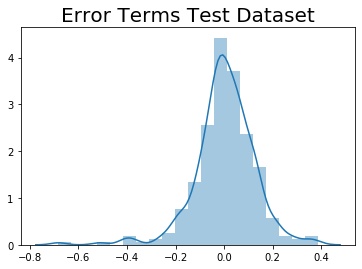

In [56]:
plt.figure(figsize=(6,4))
sns.distplot((y_test - y_pred_lr), bins = 20)
plt.title('Error Terms Test Dataset', fontsize = 20)
plt.show()

### We will try to apply advance regression techniques e.g Lasso and Ridge to see if we can regularise the model for optimal performance across train and test datasets with higher R2. 

### Lasso

In [88]:
folds = 5
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

X_train_lasso = X_train[col_]
y_train_lasso = y_train
X_test_lasso = X_test[col_]
y_test_lasso = y_test

# cross validation
model_cv_L = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_L.fit(X_train_lasso, y_train_lasso)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

#### Calculating Optimal value of Alpha for Lasso regularisation 

In [89]:
# Printing the best hyperparameter alpha
print(model_cv_L.best_params_)

{'alpha': 0.0001}


In [90]:
#Fitting lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso, y_train_lasso) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [91]:
lasso.coef_

array([ 4.90091547e-02,  8.11351072e-02,  5.22900545e-02,  4.65018078e-02,
        2.52925414e-03,  1.48529050e-01,  4.66584236e-02, -1.02567878e-01,
        2.12045659e-01,  2.09799917e-01,  2.44298658e-01,  1.44636928e-01,
       -1.51929122e-01,  9.62401648e-02,  8.79338681e-02,  7.44286793e-02,
       -4.97616326e-02,  6.21379229e-02, -1.05698247e-01, -8.89782405e-02,
       -8.68921543e-02, -5.36420834e-02, -7.55397707e-02, -4.01215610e-02,
       -6.37961298e-02,  5.71313428e-02, -8.52234171e-02, -6.79291874e-02,
        3.47600014e-02, -7.82312514e-02, -1.11644027e-01, -9.58575559e-02,
       -1.36955380e-01, -1.06327705e-01, -1.09808015e-01, -1.07167046e-01,
        5.23256246e-02, -8.72583798e-02, -9.32943106e-02, -1.05487449e-01,
        5.12878268e-02, -4.77628413e-02, -1.77733072e-17,  0.00000000e+00,
       -5.65732461e-02, -2.94135656e-02,  8.45223461e-02,  5.32423774e-02,
        7.01929348e-02,  4.45543914e-02])

In [61]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_lasso)
y_pred_test = lasso.predict(X_test_lasso)

metric1 = []
r2_train_lr = r2_score(y_train_lasso, y_pred_train)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test_lasso, y_pred_test)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train_lasso - y_pred_train))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test_lasso - y_pred_test))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train_lasso, y_pred_train)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test_lasso, y_pred_test)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.9017159982214457
0.9130288384997498
17.49996241230045
4.739158374630925
0.014982844531079153
0.01622999443366755


## Ridge 

In [92]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()
X_train_ridge = X_train[col_]
y_train_ridge = y_train
X_test_ridge = X_test[col_]
y_test_ridge = y_test

# cross validation
folds = 5
model_cv_R = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_R.fit(X_train_ridge, y_train_ridge) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

#### Calculating Optimal value of Alpha for Ridge regularisation 

In [93]:
# Printing the best hyperparameter alpha
print(model_cv_R.best_params_)

{'alpha': 2.0}


In [94]:
#Fitting Ridge model for alpha = 2.0 and printing coefficients which have been penalised
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_ridge, y_train_ridge) 
print(ridge.coef_)

[ 0.04914929  0.08243769  0.05260793  0.04656974  0.00784331  0.14768171
  0.04731958 -0.1033905   0.1119056   0.10705896  0.14630331  0.04823908
 -0.13168784  0.08918582  0.07733406  0.06996165 -0.05028663  0.0651774
 -0.10338825 -0.0886401  -0.08363818 -0.05142267 -0.07377875 -0.03948906
 -0.06250281  0.05743938 -0.08201976 -0.06810977  0.03312979 -0.06402372
 -0.09786007 -0.08272329 -0.12136188 -0.09291062 -0.09594049 -0.09406667
  0.04798184 -0.08242007 -0.08299276 -0.09981886  0.0522073  -0.01868698
 -0.01868698  0.01623427 -0.05382831 -0.0482455   0.08186532  0.05560752
  0.06975131  0.04729324]


In [95]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_ridge)
y_pred_test = ridge.predict(X_test_ridge)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9007189723458799
0.9077158088244079
17.6774878999765
5.028671457430064
0.0151348355308018
0.017221477593938574


In [84]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

ls_metric = pd.Series(metric1, name = 'Lasso Regression')
rg_metric = pd.Series(metric2, name = 'Ridge Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.902417          0.900719          0.901716
1   R2 Score (Test)           0.915595          0.907716          0.913029
2       RSS (Train)          17.375063         17.677488         17.499962
3        RSS (Test)           4.599334          5.028671          4.739158
4      RMSE (Train)           0.121967          0.123024          0.122404
5       RMSE (Test)           0.125504          0.131231          0.127397

#### Post Lasso Regularisation we observe that the RMSE between the Train and Test Set is stable (slightly better than Ridge) and Accuracy is above 80%+.       For the exercise at hand we will use Lasso model for predicting and Validating our assumptions. 

## Betas - Across models

In [85]:
betas = pd.DataFrame(index=X_train_ridge.columns)
betas.rows = X_train_ridge.columns
betas['Linear'] =lm_sm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

pd.set_option('display.max_rows', None)
betas

Linear     Ridge         Lasso
LotArea                0.049050  0.049149  4.900915e-02
OverallQual            0.078201  0.082438  8.113511e-02
OverallCond            0.051992  0.052608  5.229005e-02
BsmtFinSF1             0.046313  0.046570  4.650181e-02
BsmtFinSF2             0.111888  0.007843  2.529254e-03
GrLivArea              0.149252  0.147682  1.485291e-01
GarageCars             0.046073  0.047320  4.665842e-02
Age_Build             -0.102842 -0.103390 -1.025679e-01
MSZoning_FV            0.348566  0.111906  2.120457e-01
MSZoning_RH            0.352536  0.107059  2.097999e-01
MSZoning_RL            0.380140  0.146303  2.442987e-01
MSZoning_RM            0.278380  0.048239  1.446369e-01
LotShape_IR3          -0.168207 -0.131688 -1.519291e-01
LandContour_HLS        0.111519  0.089186  9.624016e-02
LandContour_Low        0.109780  0.077334  8.793387e-02
LandContour_Lvl        0.088381  0.069962  7.442868e-02
Neighborhood_CollgCr  -0.053116 -0.050287 -4.976163e-02
Neighborhood_Crawfor   0.060024  0.065177  6.213792e-02
Neighborhood_Edwards  -0.110669 -0.103388 -1.056982e-01
Neighborhood_Gilbert  -0.093057 -0.088640 -8.897824e-02
Neighborhood_Mitchel  -0.096845 -0.083638 -8.689215e-02
Neighborhood_NAmes    -0.060458 -0.051423 -5.364208e-02
Neighborhood_NWAmes   -0.081942 -0.073779 -7.553977e-02
Neighborhood_Sawyer   -0.047732 -0.039489 -4.012156e-02
Neighborhood_SawyerW  -0.071221 -0.062503 -6.379613e-02
Condition1_Norm        0.056814  0.057439  5.713134e-02
BldgType_Duplex       -0.090052 -0.082020 -8.522342e-02
BldgType_Others       -0.071462 -0.068110 -6.792919e-02
HouseStyle_Others      0.044483  0.033130  3.476000e-02
Exterior1st_CemntBd   -0.107633 -0.064024 -7.823125e-02
Exterior1st_HdBoard   -0.135340 -0.097860 -1.116440e-01
Exterior1st_MetalSd   -0.119443 -0.082723 -9.585756e-02
Exterior1st_Others    -0.163492 -0.121362 -1.369554e-01
Exterior1st_Plywood   -0.129835 -0.092911 -1.063277e-01
Exterior1st_VinylSd   -0.135351 -0.095940 -1.098080e-01
Exterior1st_Wd Sdng   -0.131569 -0.094067 -1.071670e-01
ExterQual_Others       0.075196  0.047982  5.232562e-02
BsmtQual_Gd           -0.094836 -0.082420 -8.725838e-02
BsmtQual_Others       -0.102503 -0.082993 -9.329431e-02
BsmtQual_TA           -0.112950 -0.099819 -1.054874e-01
BsmtExposure_Gd        0.049446  0.052207  5.128783e-02
BsmtExposure_Others    0.144293 -0.018687 -4.776284e-02
BsmtFinType1_Others    0.144293 -0.018687 -1.777331e-17
BsmtFinType2_Unf       0.343672  0.016234  0.000000e+00
HeatingQC_Fa          -0.064710 -0.053828 -5.657325e-02
HeatingQC_Others      -0.159753 -0.048245 -2.941357e-02
Functional_Typ         0.088689  0.081865  8.452235e-02
SaleCondition_Normal   0.055064  0.055608  5.324238e-02
SaleCondition_Others   0.079073  0.069751  7.019293e-02
SaleCondition_Partial  0.046223  0.047293  4.455439e-02

### Betas Using Lasso Regularisation and TOP Predictors

In [69]:
betas['Lasso'].sort_values(ascending=False)

MSZoning_RL              2.442987e-01
MSZoning_FV              2.120457e-01
MSZoning_RH              2.097999e-01
GrLivArea                1.485291e-01
MSZoning_RM              1.446369e-01
LandContour_HLS          9.624016e-02
LandContour_Low          8.793387e-02
Functional_Typ           8.452235e-02
OverallQual              8.113511e-02
LandContour_Lvl          7.442868e-02
SaleCondition_Others     7.019293e-02
Neighborhood_Crawfor     6.213792e-02
Condition1_Norm          5.713134e-02
SaleCondition_Normal     5.324238e-02
ExterQual_Others         5.232562e-02
OverallCond              5.229005e-02
BsmtExposure_Gd          5.128783e-02
LotArea                  4.900915e-02
GarageCars               4.665842e-02
BsmtFinSF1               4.650181e-02
SaleCondition_Partial    4.455439e-02
HouseStyle_Others        3.476000e-02
BsmtFinSF2               2.529254e-03
BsmtFinType2_Unf         0.000000e+00
BsmtFinType1_Others     -1.777331e-17
HeatingQC_Others        -2.941357e-02
Neighborhood

#### Top 5 Predictors impacting the House Price +vely (in decreasing order of influence) 
- MSZoning_RL     
- MSZoning_FV     
- MSZoning_RH    
- GrLivArea        
- MSZoning_RM
##### Others being:
- LandContour
- Functional_Typ
- OverallQual

#### Top 5 Predictors impacting the House Price -vely (in increaasing order of influence)
- Exterior1st_Wd Sdng 
- Exterior1st_VinylSd 
- Exterior1st_HdBoard 
- Exterior1st_Others  
- LotShape_IR3 
##### Others being:
- Age_Build          
- Neighborhood

## Actual Vs Predicted Prices using Lasso Regularisation 

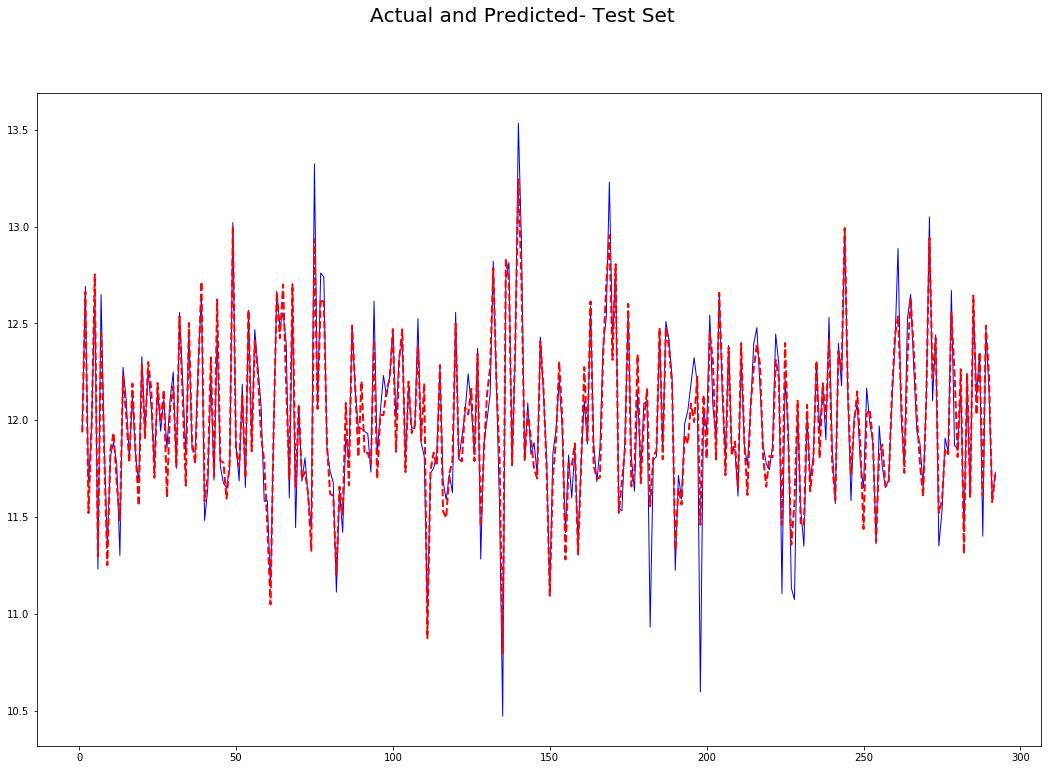

In [70]:
c = [i for i in range(1,293,1)]
fig = plt.figure(figsize=(18,12))
plt.plot(c,y_test_lasso[:292], color="blue", linewidth=1, linestyle="-")
plt.plot(c,y_pred_test[:292], color="red",  linewidth=2,linestyle='dashed')
fig.suptitle('Actual and Predicted- Test Set', fontsize=20)
plt.show()

# Normailty of Residual / Error Terms

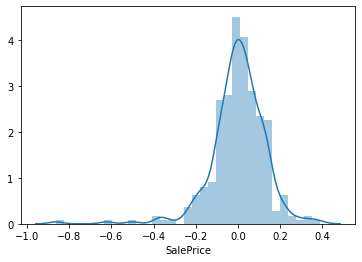

In [71]:
residual = y_test_lasso - y_pred_test
sns.distplot(residual)

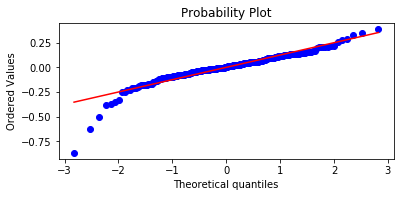

In [72]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

# Homoscedasticity

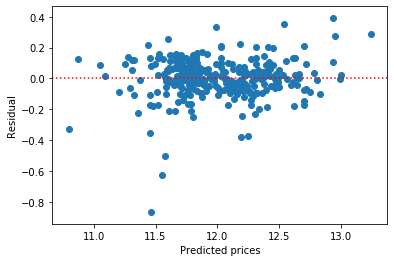

In [74]:
plt.scatter(y_pred_test , residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted prices")
plt.ylabel("Residual")
plt.show()

# ==================Subjective Questions=======================

#### Question 1
What is the optimal value of alpha for ridge and lasso regression? 
What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 
What will be the most important predictor variables after the change is implemented. 

##### Optimal value of alpha for lasso regression

In [97]:
print(model_cv_L.best_params_)

{'alpha': 0.0001}


#### changing the alpha to .0001x2 = 0.0002 and refitting the model 

In [99]:
#Fitting lasso model for alpha = 0.0002 and printing coefficients which have been penalised

alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso, y_train_lasso)

lasso.coef_

array([ 0.04897407,  0.08403186,  0.05253312,  0.04670542,  0.00253812,
        0.14761427,  0.04743112, -0.10236951,  0.07780969,  0.06932805,
        0.11078849,  0.01359386, -0.13554365,  0.08130014,  0.06664393,
        0.06091669, -0.04648949,  0.06438756, -0.10090442, -0.08491732,
       -0.07735024, -0.04718375, -0.06934033, -0.03307014, -0.05661515,
        0.05677319, -0.08075   , -0.06474999,  0.02681397, -0.04917613,
       -0.08803867, -0.07195137, -0.11065449, -0.08281804, -0.08442949,
       -0.08300998,  0.02925759, -0.07973906, -0.0842672 , -0.09779472,
        0.05293785, -0.04007503, -0.        ,  0.        , -0.04878297,
       -0.        ,  0.08028704,  0.05139893,  0.06111229,  0.04275651])

In [101]:
# Lets calculate revised metrics e.g  R2 score, RSS and RMSE with new aplha

y_pred_train = lasso.predict(X_train_lasso)
y_pred_test = lasso.predict(X_test_lasso)


metric1 = []
r2_train_lr = r2_score(y_train_lasso, y_pred_train)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test_lasso, y_pred_test)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train_lasso - y_pred_train))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test_lasso - y_pred_test))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train_lasso, y_pred_train)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test_lasso, y_pred_test)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.8998606413280601
0.905988371123243
17.830318068440768
5.122801519704849
0.01526568327777463
0.017543840820907017


##### Optimal value of alpha for Ridge regression

In [98]:
print(model_cv_R.best_params_)

{'alpha': 2.0}


#### changing the alpha to 2x2 = 4 and refitting the ridge model

In [102]:
#Fitting Ridge model for alpha = 4.0 and printing coefficients which have been penalised
alpha = 4.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_ridge, y_train_ridge) 
print(ridge.coef_)

[ 0.04917636  0.08516445  0.05253435  0.04699622  0.00762217  0.14675315
  0.04814077 -0.102714    0.06942681  0.06077921  0.10291324  0.00739013
 -0.10861524  0.07705647  0.06220653  0.06017553 -0.04719454  0.06650607
 -0.09842598 -0.08369603 -0.07503409 -0.0465637  -0.06824432 -0.03469359
 -0.056831    0.0574818  -0.07692846 -0.0649895   0.02829631 -0.04090496
 -0.07789663 -0.06221954 -0.09884937 -0.07225678 -0.07445733 -0.07377468
  0.03796102 -0.07466079 -0.07197849 -0.09107768  0.05292743 -0.01810537
 -0.01810537  0.01571305 -0.04842863 -0.02789646  0.07796365  0.05291274
  0.0600089   0.04581636]


In [103]:
# Lets calculate revised metrics e.g  R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_ridge)
y_pred_test = ridge.predict(X_test_ridge)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.899431638781636
0.9062279836727601
17.906704136380057
5.109744756967381
0.01533108230854457
0.01749912588002528


In [104]:
betas = pd.DataFrame(index=X_train_ridge.columns)
betas.rows = X_train_ridge.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [109]:
#with revised alphas 
betas

Ridge     Lasso
LotArea                0.049176  0.048974
OverallQual            0.085164  0.084032
OverallCond            0.052534  0.052533
BsmtFinSF1             0.046996  0.046705
BsmtFinSF2             0.007622  0.002538
GrLivArea              0.146753  0.147614
GarageCars             0.048141  0.047431
Age_Build             -0.102714 -0.102370
MSZoning_FV            0.069427  0.077810
MSZoning_RH            0.060779  0.069328
MSZoning_RL            0.102913  0.110788
MSZoning_RM            0.007390  0.013594
LotShape_IR3          -0.108615 -0.135544
LandContour_HLS        0.077056  0.081300
LandContour_Low        0.062207  0.066644
LandContour_Lvl        0.060176  0.060917
Neighborhood_CollgCr  -0.047195 -0.046489
Neighborhood_Crawfor   0.066506  0.064388
Neighborhood_Edwards  -0.098426 -0.100904
Neighborhood_Gilbert  -0.083696 -0.084917
Neighborhood_Mitchel  -0.075034 -0.077350
Neighborhood_NAmes    -0.046564 -0.047184
Neighborhood_NWAmes   -0.068244 -0.069340
Neighborhood_Sawyer   -0.034694 -0.033070
Neighborhood_SawyerW  -0.056831 -0.056615
Condition1_Norm        0.057482  0.056773
BldgType_Duplex       -0.076928 -0.080750
BldgType_Others       -0.064989 -0.064750
HouseStyle_Others      0.028296  0.026814
Exterior1st_CemntBd   -0.040905 -0.049176
Exterior1st_HdBoard   -0.077897 -0.088039
Exterior1st_MetalSd   -0.062220 -0.071951
Exterior1st_Others    -0.098849 -0.110654
Exterior1st_Plywood   -0.072257 -0.082818
Exterior1st_VinylSd   -0.074457 -0.084429
Exterior1st_Wd Sdng   -0.073775 -0.083010
ExterQual_Others       0.037961  0.029258
BsmtQual_Gd           -0.074661 -0.079739
BsmtQual_Others       -0.071978 -0.084267
BsmtQual_TA           -0.091078 -0.097795
BsmtExposure_Gd        0.052927  0.052938
BsmtExposure_Others   -0.018105 -0.040075
BsmtFinType1_Others   -0.018105 -0.000000
BsmtFinType2_Unf       0.015713  0.000000
HeatingQC_Fa          -0.048429 -0.048783
HeatingQC_Others      -0.027896 -0.000000
Functional_Typ         0.077964  0.080287
SaleCondition_Normal   0.052913  0.051399
SaleCondition_Others   0.060009  0.061112
SaleCondition_Partial  0.045816  0.042757

#### With removing the top 5 predictor from previous lasso model and rebuild 


In [114]:
# removed all -- 'MSZoning_* and GrLivArea 
col__ = ['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2','GarageCars', 'Age_Build', 'LotShape_IR3', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Condition1_Norm',
       'BldgType_Duplex', 'BldgType_Others', 'HouseStyle_Others',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_Others', 'Exterior1st_Plywood', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'ExterQual_Others', 'BsmtQual_Gd',
       'BsmtQual_Others', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'BsmtExposure_Others', 'BsmtFinType1_Others', 'BsmtFinType2_Unf',
       'HeatingQC_Fa', 'HeatingQC_Others', 'Functional_Typ',
       'SaleCondition_Normal', 'SaleCondition_Others',
       'SaleCondition_Partial']

In [115]:
folds = 5
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

X_train_lasso = X_train[col__]
y_train_lasso = y_train
X_test_lasso = X_test[col__]
y_test_lasso = y_test

# cross validation
model_cv_L = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_L.fit(X_train_lasso, y_train_lasso)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [116]:
# Printing the best hyperparameter alpha
print(model_cv_L.best_params_)

{'alpha': 0.0001}


In [117]:
#Fitting lasso model for alpha = 0.0001 and printing coefficients which have been penalised
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso, y_train_lasso) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [118]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_lasso)
y_pred_test = lasso.predict(X_test_lasso)

metric1 = []
r2_train_lr = r2_score(y_train_lasso, y_pred_train)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test_lasso, y_pred_test)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train_lasso - y_pred_train))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test_lasso - y_pred_test))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train_lasso, y_pred_train)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

betas = pd.DataFrame(index=X_train_ridge.columns)
betas.rows = X_train_ridge.columns

mse_test_lr = mean_squared_error(y_test_lasso, y_pred_test)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.838930562400394
0.8301919686057737
28.6792260465174
9.25303445624586
0.02455413188914161
0.03168847416522555


In [119]:
betas_ = pd.DataFrame(index=X_train_lasso.columns)
betas_.rows = X_train_lasso.columns
betas_['Lasso'] = lasso.coef_

In [122]:
betas_['Lasso'].sort_values(ascending=False)

OverallQual              1.655414e-01
Neighborhood_Crawfor     1.375706e-01
LotArea                  1.045905e-01
GarageCars               7.431506e-02
SaleCondition_Others     5.479561e-02
SaleCondition_Normal     5.024926e-02
BsmtFinSF1               4.396939e-02
LandContour_Lvl          4.101181e-02
OverallCond              3.914258e-02
SaleCondition_Partial    3.869027e-02
Condition1_Norm          3.611998e-02
BsmtExposure_Gd          2.861821e-02
LandContour_HLS          1.155251e-02
ExterQual_Others         8.851509e-03
LandContour_Low          5.551632e-03
BsmtFinSF2               3.530747e-03
BldgType_Duplex          2.115485e-03
Functional_Typ           0.000000e+00
BsmtFinType2_Unf         0.000000e+00
BsmtFinType1_Others     -1.523426e-18
BsmtExposure_Others     -1.062618e-02
BldgType_Others         -1.484154e-02
HouseStyle_Others       -2.858513e-02
Neighborhood_NWAmes     -4.372754e-02
Neighborhood_Gilbert    -5.167627e-02
Neighborhood_NAmes      -5.837714e-02
Neighborhood